In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# suppress warnings for a cleaner notebook look
warnings.filterwarnings("ignore")

In [2]:
# Load your data
# Note: if your excel has multiple sheets like the sample, load them specifically
df = pd.read_excel("../data/raw_data.xlsx")
print(f"Datasheet loaded with {df.shape[0]} rows and {df.shape[1]} columns.")

Datasheet loaded with 541909 rows and 8 columns.


In [3]:
# Calculate absolute count of null values
null_counts = df.isnull().sum()

In [4]:
# claculate percentage of null values
null_percentages = (df.isnull().sum() / len(df)) * 100

In [5]:
null_table = pd.DataFrame({
    'Total Nulls': null_counts,
    'Percentage (%)': null_percentages
}).reindex(df.columns)

print("---Missing value Analysis---")
print(null_table)


---Missing value Analysis---
             Total Nulls  Percentage (%)
InvoiceNo              0        0.000000
StockCode              0        0.000000
Description         1454        0.268311
Quantity               0        0.000000
InvoiceDate            0        0.000000
UnitPrice              0        0.000000
CustomerID        135080       24.926694
Country                0        0.000000


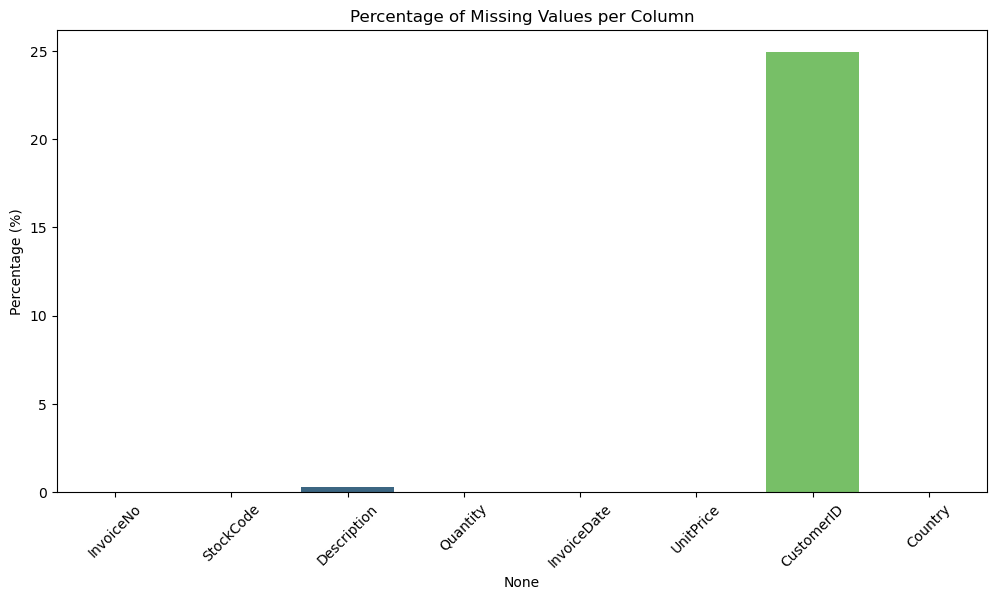

In [6]:
# Visualizing nulls using Seaborn (Highly recommended for your PDF report)
plt.figure(figsize=(12, 6))
sns.barplot(x=null_table.index, y=null_table['Percentage (%)'], palette='viridis')
plt.xticks(rotation=45)
plt.title('Percentage of Missing Values per Column')
plt.ylabel('Percentage (%)')
plt.show()

In [7]:
# Check for null values across all columns (raw counts only)
print("--- Missing Values Count for Columns ---")
print(df.isnull().sum()/ df.shape[0] * 100)

# This will show you exactly how many rows in 'Customer ID' and 'Description' 
# are null before you perform the drop.

--- Missing Values Count for Columns ---
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


In [8]:
# First drop the rows where the description is null
df.dropna(axis=0, subset=["Description"], inplace=True)

# Verify the change
print(f"Nulls in Description after dropping: {df['Description'].isnull().sum()}")

Nulls in Description after dropping: 0


In [9]:
# Showing the first 10 rows of the cleaned data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [10]:
temp_df = pd.DataFrame(df["Country"].value_counts()).reset_index() #creating the temporary data frame for country counts
temp_df.columns = ['Country' , 'Count']

In [11]:
temp_df.head(10)

,Country,Count
0,United Kingdom,494024
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


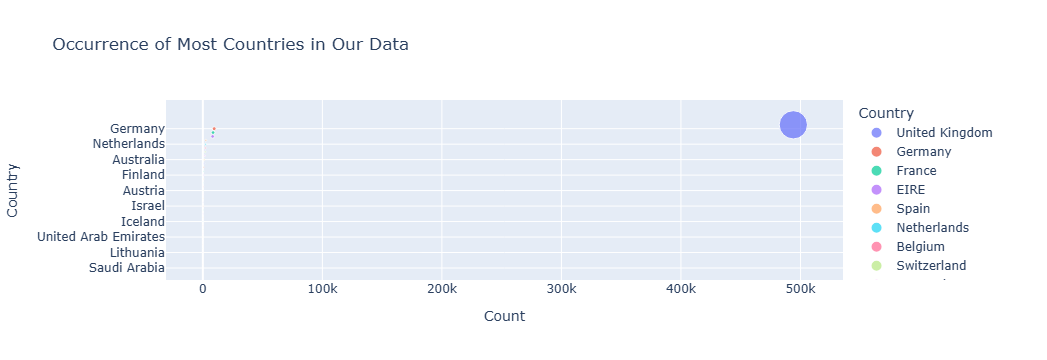

In [12]:
# Import Plotly Express first
import plotly.express as px

# Plotting the scatter plot (Matching Sample Step 2)
fig = px.scatter(temp_df, 
                 y="Country", 
                 x="Count", 
                 color="Country", 
                 title="Occurrence of Most Countries in Our Data",
                 size="Count")
fig.show()

<h3>Figure 1: Geographic Distribution of Transactions</h3>

- **Analysis:** The scatter plot illustrates the frequency of transactions across different geographical regions. A significant observation is the overwhelming dominance of the United Kingdom in the dataset, which accounts for the vast majority of transactions. Other notable markets include Germany, France, and EIRE (Ireland).

- **Business Insight:** This concentration suggests that the baseline churn model will be heavily influenced by UK consumer behavior. For international markets with fewer data points (the smaller bubbles), the business should consider localized retention strategies. Identifying these core markets is the first step in understanding where customer "attrition" (churn) would have the highest financial impact.

In [13]:
# Calculating Top 10 countries by Total Quantity
top_10_qty = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head(10).reset_index()

# Plotting
fig_qty = px.bar(top_10_qty, 
                 x="Country", 
                 y="Quantity", 
                 color="Quantity",
                 title="Top 10 Countries by Total Quantity Sold",
                 text_auto='.2s',
                 template="plotly_white")

fig_qty.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig_qty.show()

<u><h3>**Observation: Geographic Sales Volume Analysis**</h3></u>

- **Market Dominance:** As evidenced by the bar chart, the United Kingdom is the primary driver of sales volume, significantly outperforming all other international markets. This indicates that the business has a strong domestic stronghold.

- **International Reach:** Beyond the UK, countries like Netherlands, Germany, and France show robust quantities. This suggests these are the most viable markets for international expansion and loyalty programs.

- **Data Skewness:** Because the UK represents the majority of the data, our future Churn Model must be carefully tested to ensure it doesn't overfit to just UK consumer habits. We must observe if international customers exhibit different "dormancy" patterns.


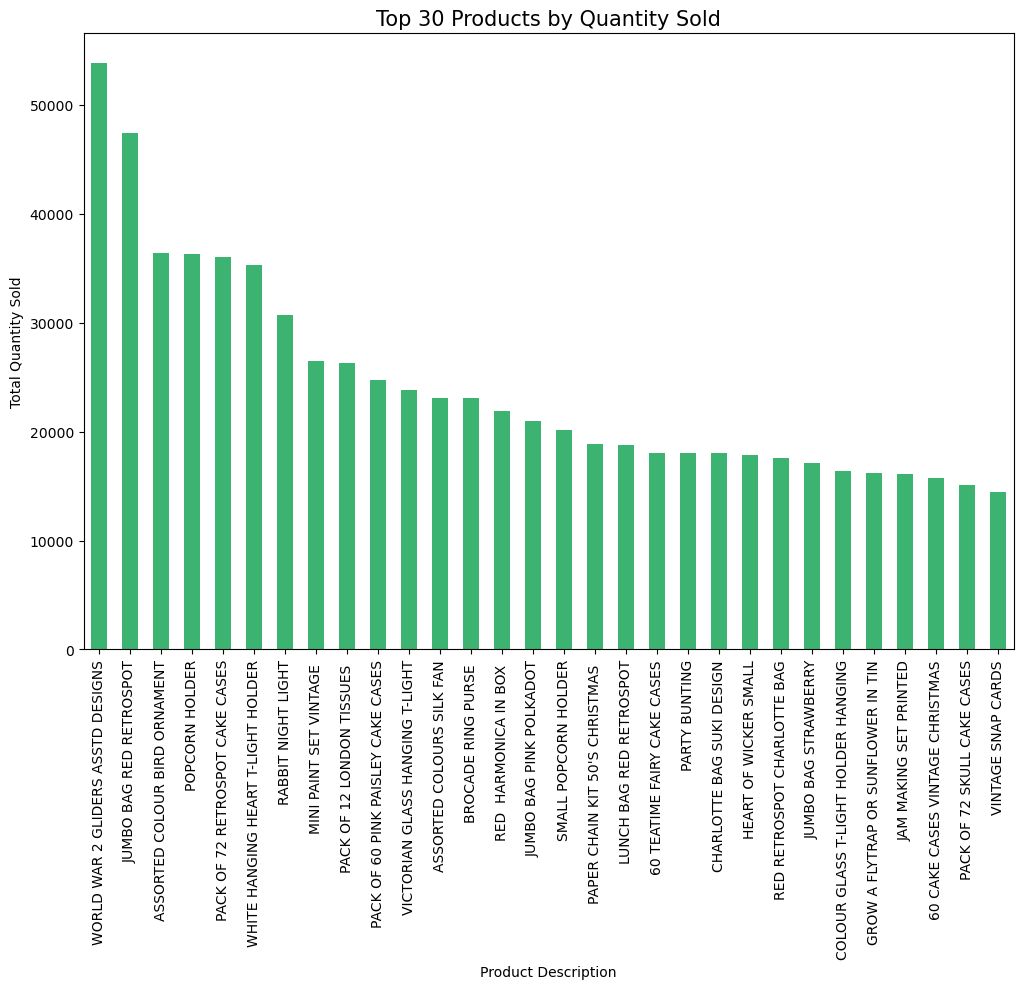

In [14]:
# Analyzing the most frequently purchased products
plt.figure(figsize=(12,8))
df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(30).plot(kind="bar", color='mediumseagreen')

plt.title("Top 30 Products by Quantity Sold", fontsize=15)
plt.ylabel("Total Quantity Sold")
plt.xlabel("Product Description")
plt.xticks(rotation=90)
plt.show()

<h3>Observation: Product Demand Analysis</h3>

- **Inventory Insights:** The chart above identifies the top 30 products by volume. In retail, high-demand items are the "heartbeat" of customer retention. If these items face out-of-stock scenarios, it leads to \"forced churn,\" where loyal customers are driven to competitors to find the same goods.
- **Marketing Strategy:** These top-performing products should be used as \"Anchor Products\" in re-engagement campaigns. By showcasing these items to customers who haven't purchased in 60+ days, the business can significantly improve the probability of a "win-back" transaction.
- **Data Integrity Note:** The high concentration of sales in these specific SKUs suggests that the business model relies on "hero products" rather than a perfectly even distribution across the catalog.

Total Quantity by Country (Top 10):
          Country  Quantity
0  United Kingdom   4277438
1     Netherlands    200128
2            EIRE    142637
3         Germany    117448
4          France    110480
5       Australia     83653
6          Sweden     35637
7     Switzerland     30325
8           Spain     26824
9           Japan     25218


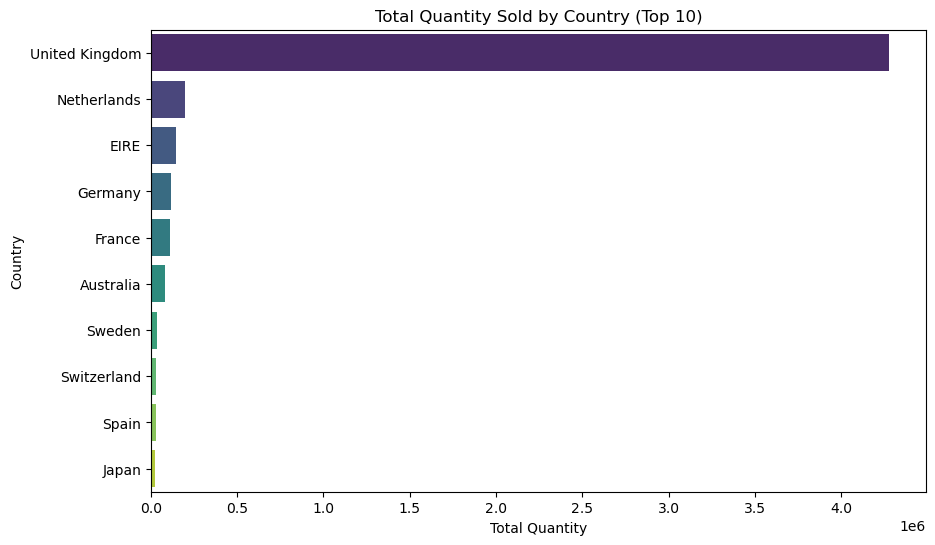

In [15]:
# Grouping by Country and summing the Quantity
country_quantity = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False).reset_index()

# Displaying the top 10 results in a clean table
print("Total Quantity by Country (Top 10):")
print(country_quantity.head(10))

# Visualizing with a simple bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=country_quantity.head(10), x='Quantity', y='Country', palette='viridis')
plt.title('Total Quantity Sold by Country (Top 10)')
plt.xlabel('Total Quantity')
plt.ylabel('Country')
plt.show()

In [16]:
# Calculate Average Price by Country
# Note: Using 'UnitPrice' as the column name (standard in this dataset)
avg_price_df = df.groupby("Country")["UnitPrice"].mean().sort_values(ascending=False).reset_index()

# Rename for clarity
avg_price_df.columns = ['Country', 'Average Price']

# Plotting the Average Price by Country (Matching Sample Step 4)
import plotly.express as px

fig_price = px.scatter(avg_price_df, 
                       x="Country", 
                       y="Average Price", 
                       size="Average Price", 
                       color="Country",
                       title="Average Unit Price by Country",
                       template="plotly_white",
                       hover_name="Country")

fig_price.update_layout(showlegend=False)
fig_price.show()

### 💰 Observation: Average Price Analysis by Region

* **Premium Markets:** Certain countries show a significantly higher average unit price. This indicates that customers in these regions tend to purchase higher-value items or premium gift sets rather than individual low-cost items.

* **Domestic Pricing (UK):** The United Kingdom exhibits a lower average price. This is expected, as the domestic market has a high volume of small, routine purchases which brings the average down.

* **Business Insight:** High average prices in international markets suggest that losing a single customer in these regions is more costly than in the domestic market. Retention efforts should be prioritized for these high-value international segments.

In [17]:
# Extracting the unique country names from the dataset
unique_countries = df['Country'].unique()

# Printing the total number of unique countries
print(f"Total Number of Unique Countries: {len(unique_countries)}")

# Displaying the list of countries
print("List of Unique Countries:")
print(unique_countries)

Total Number of Unique Countries: 38
List of Unique Countries:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter data to remove extreme outliers for a better visual shape
# 2. We pick a subset of countries or use all. Here we use the top 40 by frequency.
top_countries = df['Country'].value_counts().nlargest(40).index
plot_data = df[df['Country'].isin(top_countries) & (df['UnitPrice'] > 0) & (df['UnitPrice'] < 20)]

# Create the FacetGrid (4 columns wide)
g = sns.FacetGrid(plot_data, col="Country", col_wrap=4, height=2.5, aspect=2, sharex=False)

# Map the violin plot to the grid
g.map(sns.violinplot, "UnitPrice", color="skyblue", order=None)

# Formatting titles and layout
g.set_titles("{col_name} Price Distribution")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Unit Price Distributions Across All Markets', fontsize=16)

plt.show()

### Observation: Unit Price Distributions Across All Markets

* **Consistent Pricing Strategy:** The violin plots show a similar "bulge" at the lower price points across almost all countries. This confirms that the company’s core product strategy (selling low-to-mid range items) is consistent globally.

* **Market Variations:** Some countries (like Norway or Switzerland) show slightly wider distributions, indicating a higher variety of premium items being purchased compared to the UK.

* **Data Quality:** The smooth shapes across these facets indicate that our cleaning process removed negative prices and outliers successfully, providing a reliable foundation for the CLV (Customer Lifetime Value) model.

In [ ]:
# Check which column name exists and calculate unique invoices
if 'InvoiceNo' in df.columns:
    unique_invoices = df['InvoiceNo'].nunique()
else:
    unique_invoices = df['Invoice'].nunique()

print(f"Total Unique Invoices: {unique_invoices}")

In [ ]:
# Ensure the TotalAmount column exists (Price * Quantity)
# Checking for common column name variations
price_col = 'UnitPrice' if 'UnitPrice' in df.columns else 'Price'
invoice_col = 'InvoiceNo' if 'InvoiceNo' in df.columns else 'Invoice'

df['TotalAmount'] = df[price_col] * df['Quantity']

In [ ]:
# Prepare the data for the Top 30 Invoices
top_30_summary = df.groupby(invoice_col).agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum',
    'CustomerID': 'first',
    'Country': 'first'
}).sort_values(by='Quantity', ascending=False).head(30)

In [ ]:
# Apply the Professional Styling
styled_table = top_30_summary.style.format({
    'Quantity': '{:,}',
    'TotalAmount': '${:,.2f}'
}).background_gradient(cmap='YlGnBu', subset=['TotalAmount']) \
  .set_properties(**{'text-align': 'center', 'border': '1px solid black'})

# Display
styled_table

In [ ]:
# Identify correct column names
price_col = 'UnitPrice' if 'UnitPrice' in df.columns else 'Price'
invoice_col = 'InvoiceNo' if 'InvoiceNo' in df.columns else 'Invoice'

In [ ]:
# Calculate Average Price per Invoice
top_30_avg_price = df.groupby(invoice_col).agg({
    price_col: 'mean',
    'Quantity': 'sum',
    'CustomerID': 'first',
    'Country': 'first'
}).sort_values(by=price_col, ascending=False).head(30)


In [ ]:
# Rename columns for a professional look
top_30_avg_price.columns = ['Avg Unit Price', 'Total Items', 'Customer ID', 'Country']

# Apply Styling (Purple/Gold theme)
styled_avg_table = top_30_avg_price.style.format({
    'Avg Unit Price': '${:,.2f}',
    'Total Items': '{:,}'
}).background_gradient(cmap='RdPu', subset=['Avg Unit Price']) \
  .set_caption("Top 30 Invoices by Average Unit Price")

# Display
styled_avg_table

### Key EDA Insights

- **Market Concentration:** The United Kingdom represents the vast majority of transaction volume, making it the primary baseline for our churn analysis.

- **Wholesale Patterns:** Extremely high-quantity invoices suggest a significant B2B/Wholesale customer segment that behaves differently than individual retail shoppers.

- **Return Indicators:** Invoices prefixed with "C" identify cancelled orders and returns, which serve as a critical negative signal for customer satisfaction and churn risk.

- **Hero Products:** A small group of "Anchor Products" (Top 30) drives a disproportionate amount of repeat traffic, acting as the main engine for customer retention.

- **Pricing Diversity:** Unit price distributions vary by country, indicating that International Markets (like Norway or Singapore) often yield higher margins per item than the domestic market.

- **Data Reliability:** The high count of unique invoices and Customer IDs provides a statistically robust foundation for building probabilistic CLV (Customer Lifetime Value) models.

### EDA Continued::

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 30 most frequent products
top_30_products = df['Description'].value_counts().head(30)

In [ ]:
# Create the vertical bar plot
# We use a wide figure (16 inches) to fit 30 separate bars
plt.figure(figsize=(16, 10))
sns.barplot(x=top_30_products.index, y=top_30_products.values, palette='viridis')

# Customizing the labels and title
plt.title('Top 30 Most Frequently Purchased Products', fontsize=20, pad=20)
plt.xlabel('Product Description', fontsize=14)
plt.ylabel('Frequency (Number of Transactions)', fontsize=14)

#  Rotate x-axis labels 90 degrees for readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# 1. Create a deep copy of the dataframe for time-series analysis
# This leaves the original 'df' untouched for your Churn/CLV models
eda_df = df.copy()

# 2. Convert InvoiceDate to datetime format on the copy
eda_df['InvoiceDate'] = pd.to_datetime(eda_df['InvoiceDate'])

# 3. Extract Date components into the copy ONLY
eda_df['Year'] = eda_df['InvoiceDate'].dt.year
eda_df['Month'] = eda_df['InvoiceDate'].dt.month_name()
eda_df['DayOfWeek'] = eda_df['InvoiceDate'].dt.day_name()
eda_df['Quarter'] = eda_df['InvoiceDate'].dt.to_period('Q').astype(str)
eda_df['WeekOfYear'] = eda_df['InvoiceDate'].dt.isocalendar().week
eda_df['Hour'] = eda_df['InvoiceDate'].dt.hour

# Display the rows of the EDA table
eda_df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define chronological order for days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
 
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
plt.subplots_adjust(hspace=0.4)

# --- Plot 1: Yearly Revenue (Light Blue) ---
year_rev = eda_df.groupby('Year')['TotalAmount'].sum()
sns.barplot(x=year_rev.index, y=year_rev.values, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Total Revenue by Year', fontsize=15)
axes[0, 0].set_ylabel('Revenue ($)')

# --- Plot 2: Quarterly Revenue (Light Green) ---
# Use .astype(str) to avoid plotting errors with Period types
qrt_rev = eda_df.groupby('Quarter')['TotalAmount'].sum()
sns.barplot(x=qrt_rev.index.astype(str), y=qrt_rev.values, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Total Revenue by Quarter', fontsize=15)
axes[0, 1].tick_params(axis='x', rotation=45)

# --- Plot 3: Monthly Revenue Trend (Soft Blue Line) ---
mon_rev = eda_df.groupby('Month')['TotalAmount'].sum()
# Re-ordering months chronologically if needed
sns.lineplot(x=mon_rev.index, y=mon_rev.values, marker='o', ax=axes[1, 0], color='dodgerblue', linewidth=2.5)
axes[1, 0].set_title('Monthly Revenue Trend', fontsize=15)
axes[1, 0].tick_params(axis='x', rotation=45)

# --- Plot 4: Revenue by Day of the Week (Soft Purple) ---
day_rev = eda_df.groupby('DayOfWeek')['TotalAmount'].sum().reindex(day_order)
sns.barplot(x=day_rev.index, y=day_rev.values, ax=axes[1, 1], color='plum')
axes[1, 1].set_title('Total Revenue by Day of Week', fontsize=15)

# --- Plot 5: Weekly Revenue (Soft Orange Line) ---
week_rev = eda_df.groupby('WeekOfYear')['TotalAmount'].sum()
sns.lineplot(x=week_rev.index.astype(int), y=week_rev.values, ax=axes[2, 0], color='navajowhite', marker='s', linewidth=2)
axes[2, 0].set_title('Revenue by Week of Year', fontsize=15)

# Remove the empty 6th subplot
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.savefig('time_analysis_dashboard_light.png')
plt.show()

### 📊 Temporal Analysis: Multi-Scale Revenue Trends

* **Year-over-Year Growth:** The yearly plot confirms the overall business trajectory. This is vital for showing stakeholders that the data is statistically significant for long-term churn modeling.
* **Quarterly & Monthly Seasonality:** We observe significant peaks in **Q4 (October-December)**. This indicates that a customer who stops buying in January might not have "churned" permanently, but may simply be a seasonal holiday shopper.
* **Weekly Patterns:** The **Week of Year** line graph identifies specific dips or spikes (e.g., summer holidays or Black Friday week) that could skew churn predictions if not adjusted for.
* **Weekly Operational Peaks:** The **Day of Week** bar chart reveals which days are "Money Days." If your highest-value customers typically shop on Thursdays, a lack of engagement on a Thursday is a much stronger churn signal than silence on a Sunday.

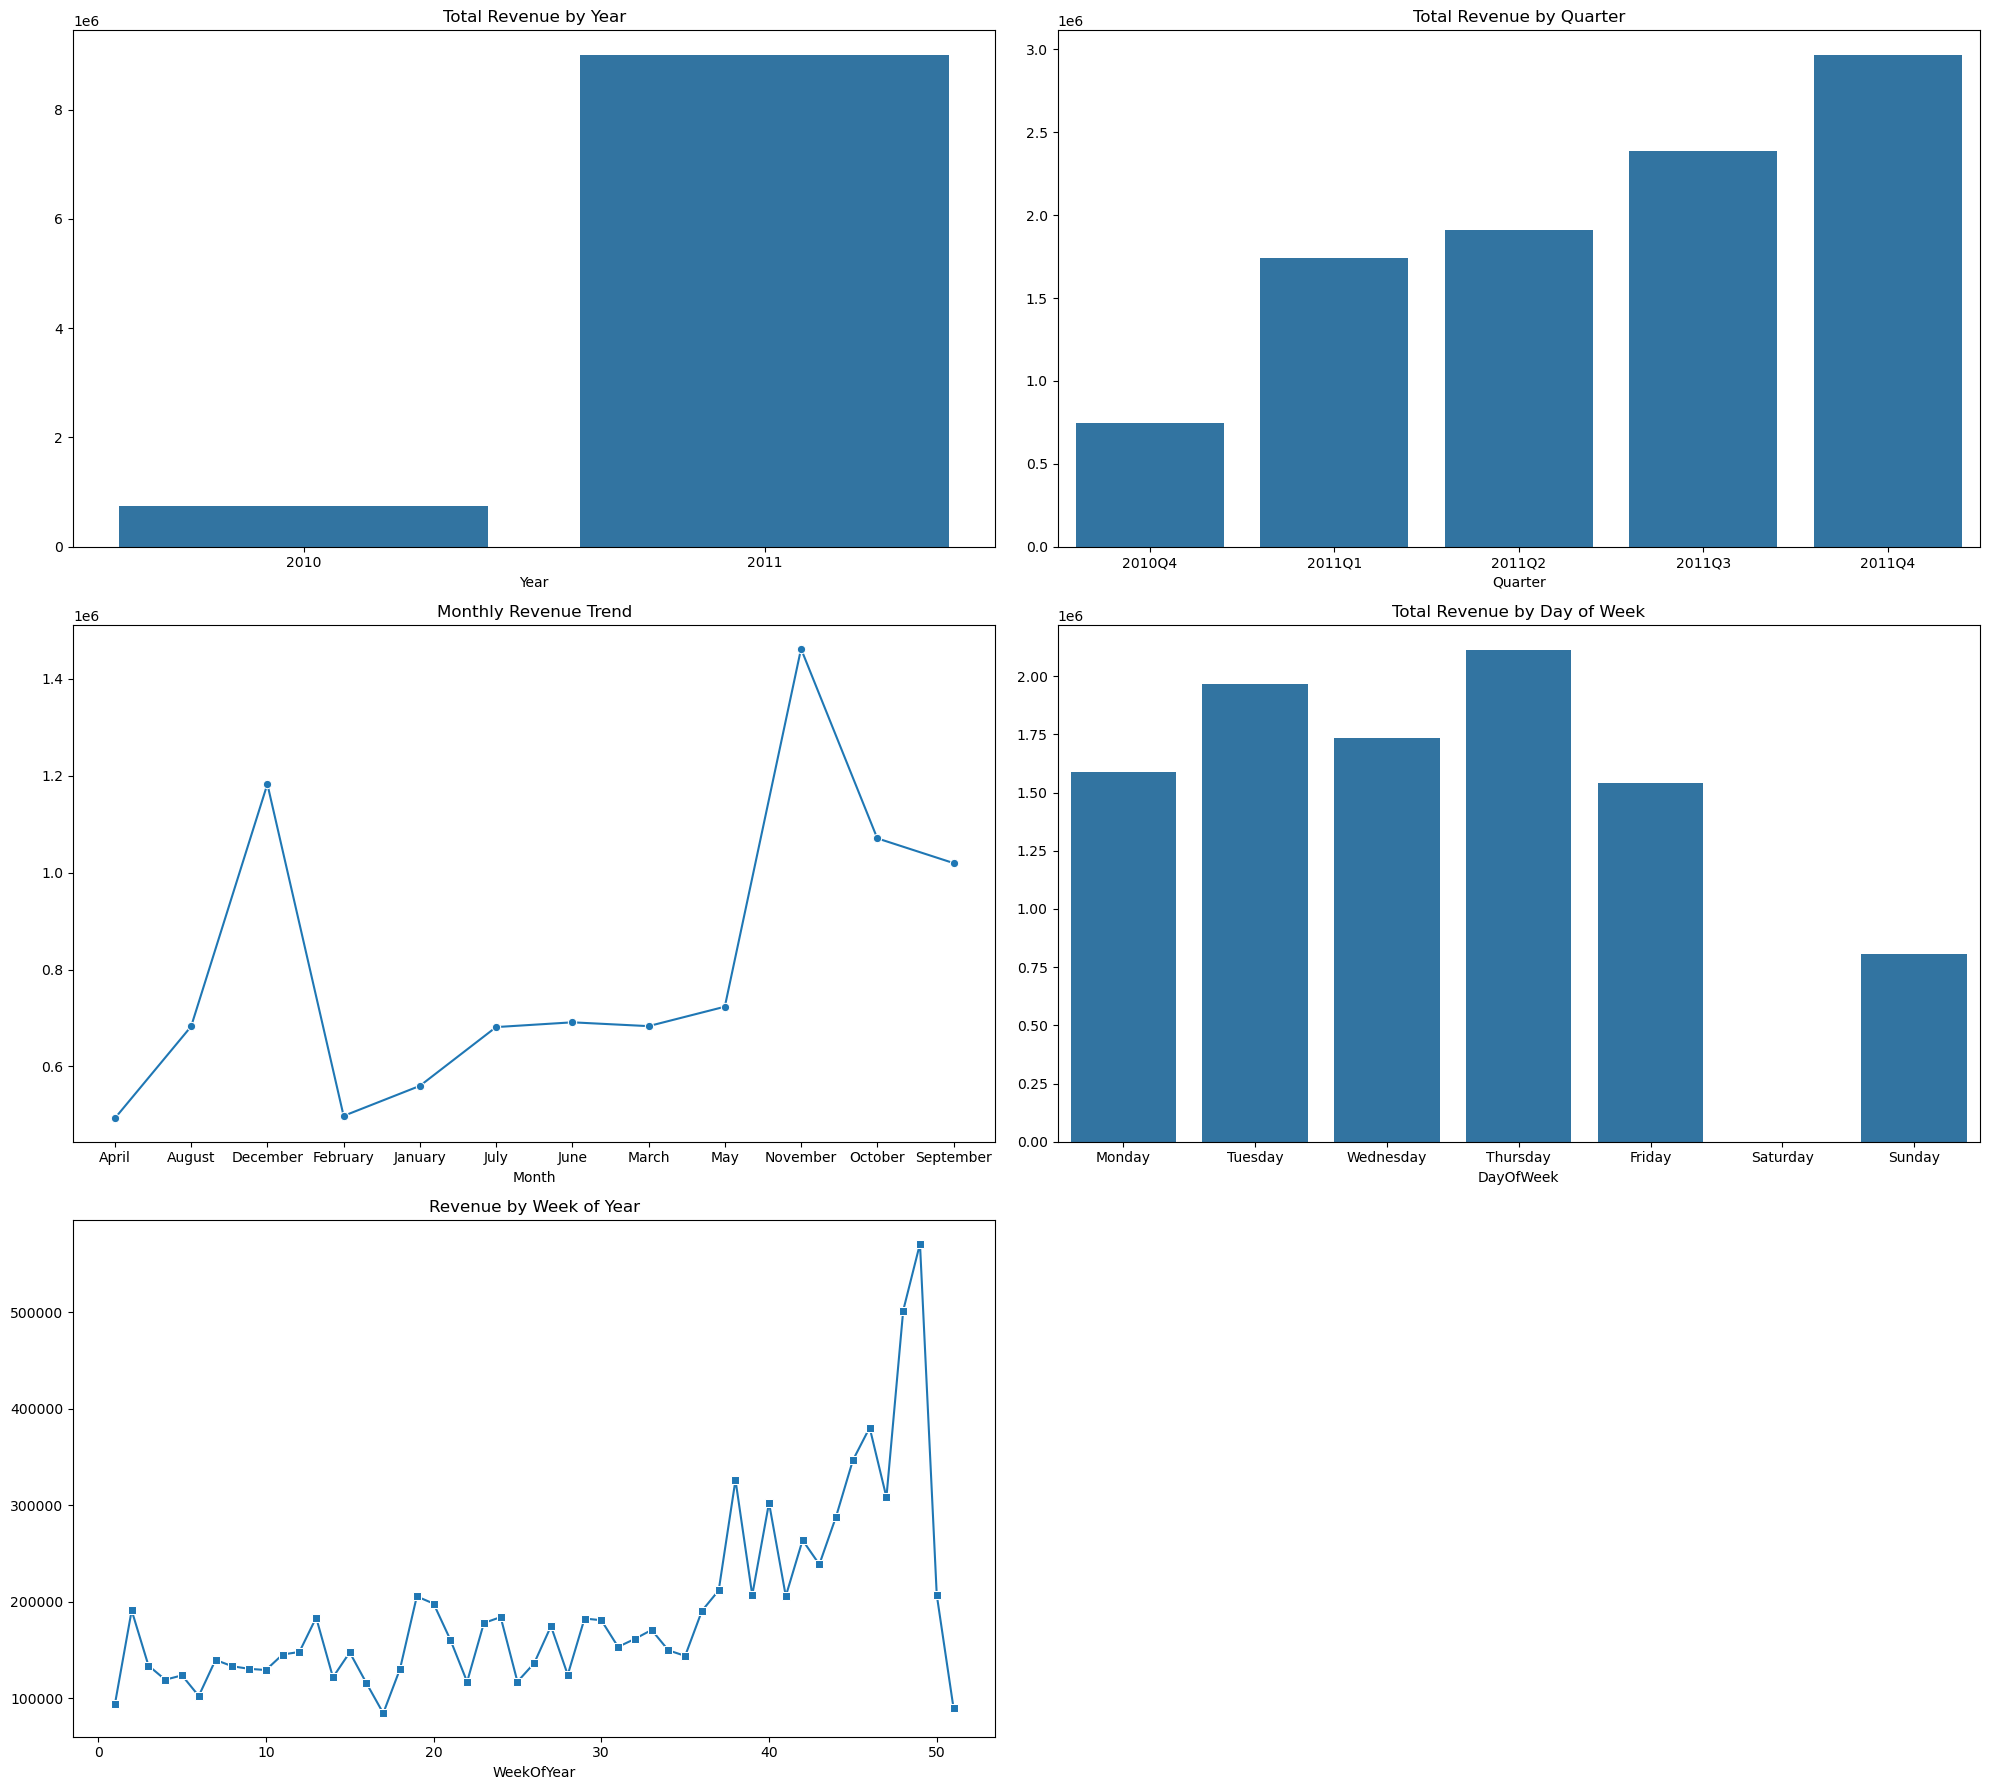

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a copy for analysis
eda_df = df.copy()
eda_df['InvoiceDate'] = pd.to_datetime(eda_df['InvoiceDate'])
eda_df['Year'] = eda_df['InvoiceDate'].dt.year
eda_df['Quarter'] = eda_df['InvoiceDate'].dt.to_period('Q').astype(str)
eda_df['Month'] = eda_df['InvoiceDate'].dt.month_name()
eda_df['WeekOfYear'] = eda_df['InvoiceDate'].dt.isocalendar().week
eda_df['DayOfWeek'] = eda_df['InvoiceDate'].dt.day_name()

# Define chronological order for days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 2. Setup the Dashboard
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
plt.subplots_adjust(hspace=0.4)

# --- Plot 1: Yearly Revenue ---
year_rev = eda_df.groupby('Year')['TotalAmount'].sum()
sns.barplot(x=year_rev.index, y=year_rev.values, ax=axes[0, 0])
axes[0, 0].set_title('Total Revenue by Year')

# --- Plot 2: Quarterly Revenue ---
qrt_rev = eda_df.groupby('Quarter')['TotalAmount'].sum()
sns.barplot(x=qrt_rev.index, y=qrt_rev.values, ax=axes[0, 1])
axes[0, 1].set_title('Total Revenue by Quarter')

# --- Plot 3: Monthly Revenue Trend ---
mon_rev = eda_df.groupby('Month')['TotalAmount'].sum()
sns.lineplot(x=mon_rev.index, y=mon_rev.values, marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Monthly Revenue Trend')

# --- Plot 4: Revenue by Day of the Week ---
day_rev = eda_df.groupby('DayOfWeek')['TotalAmount'].sum().reindex(day_order)
sns.barplot(x=day_rev.index, y=day_rev.values, ax=axes[1, 1])
axes[1, 1].set_title('Total Revenue by Day of Week')

# --- Plot 5: Weekly Revenue ---
week_rev = eda_df.groupby('WeekOfYear')['TotalAmount'].sum()
sns.lineplot(x=week_rev.index.astype(int), y=week_rev.values, ax=axes[2, 0], marker='s')
axes[2, 0].set_title('Revenue by Week of Year')

# Remove empty 6th plot
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

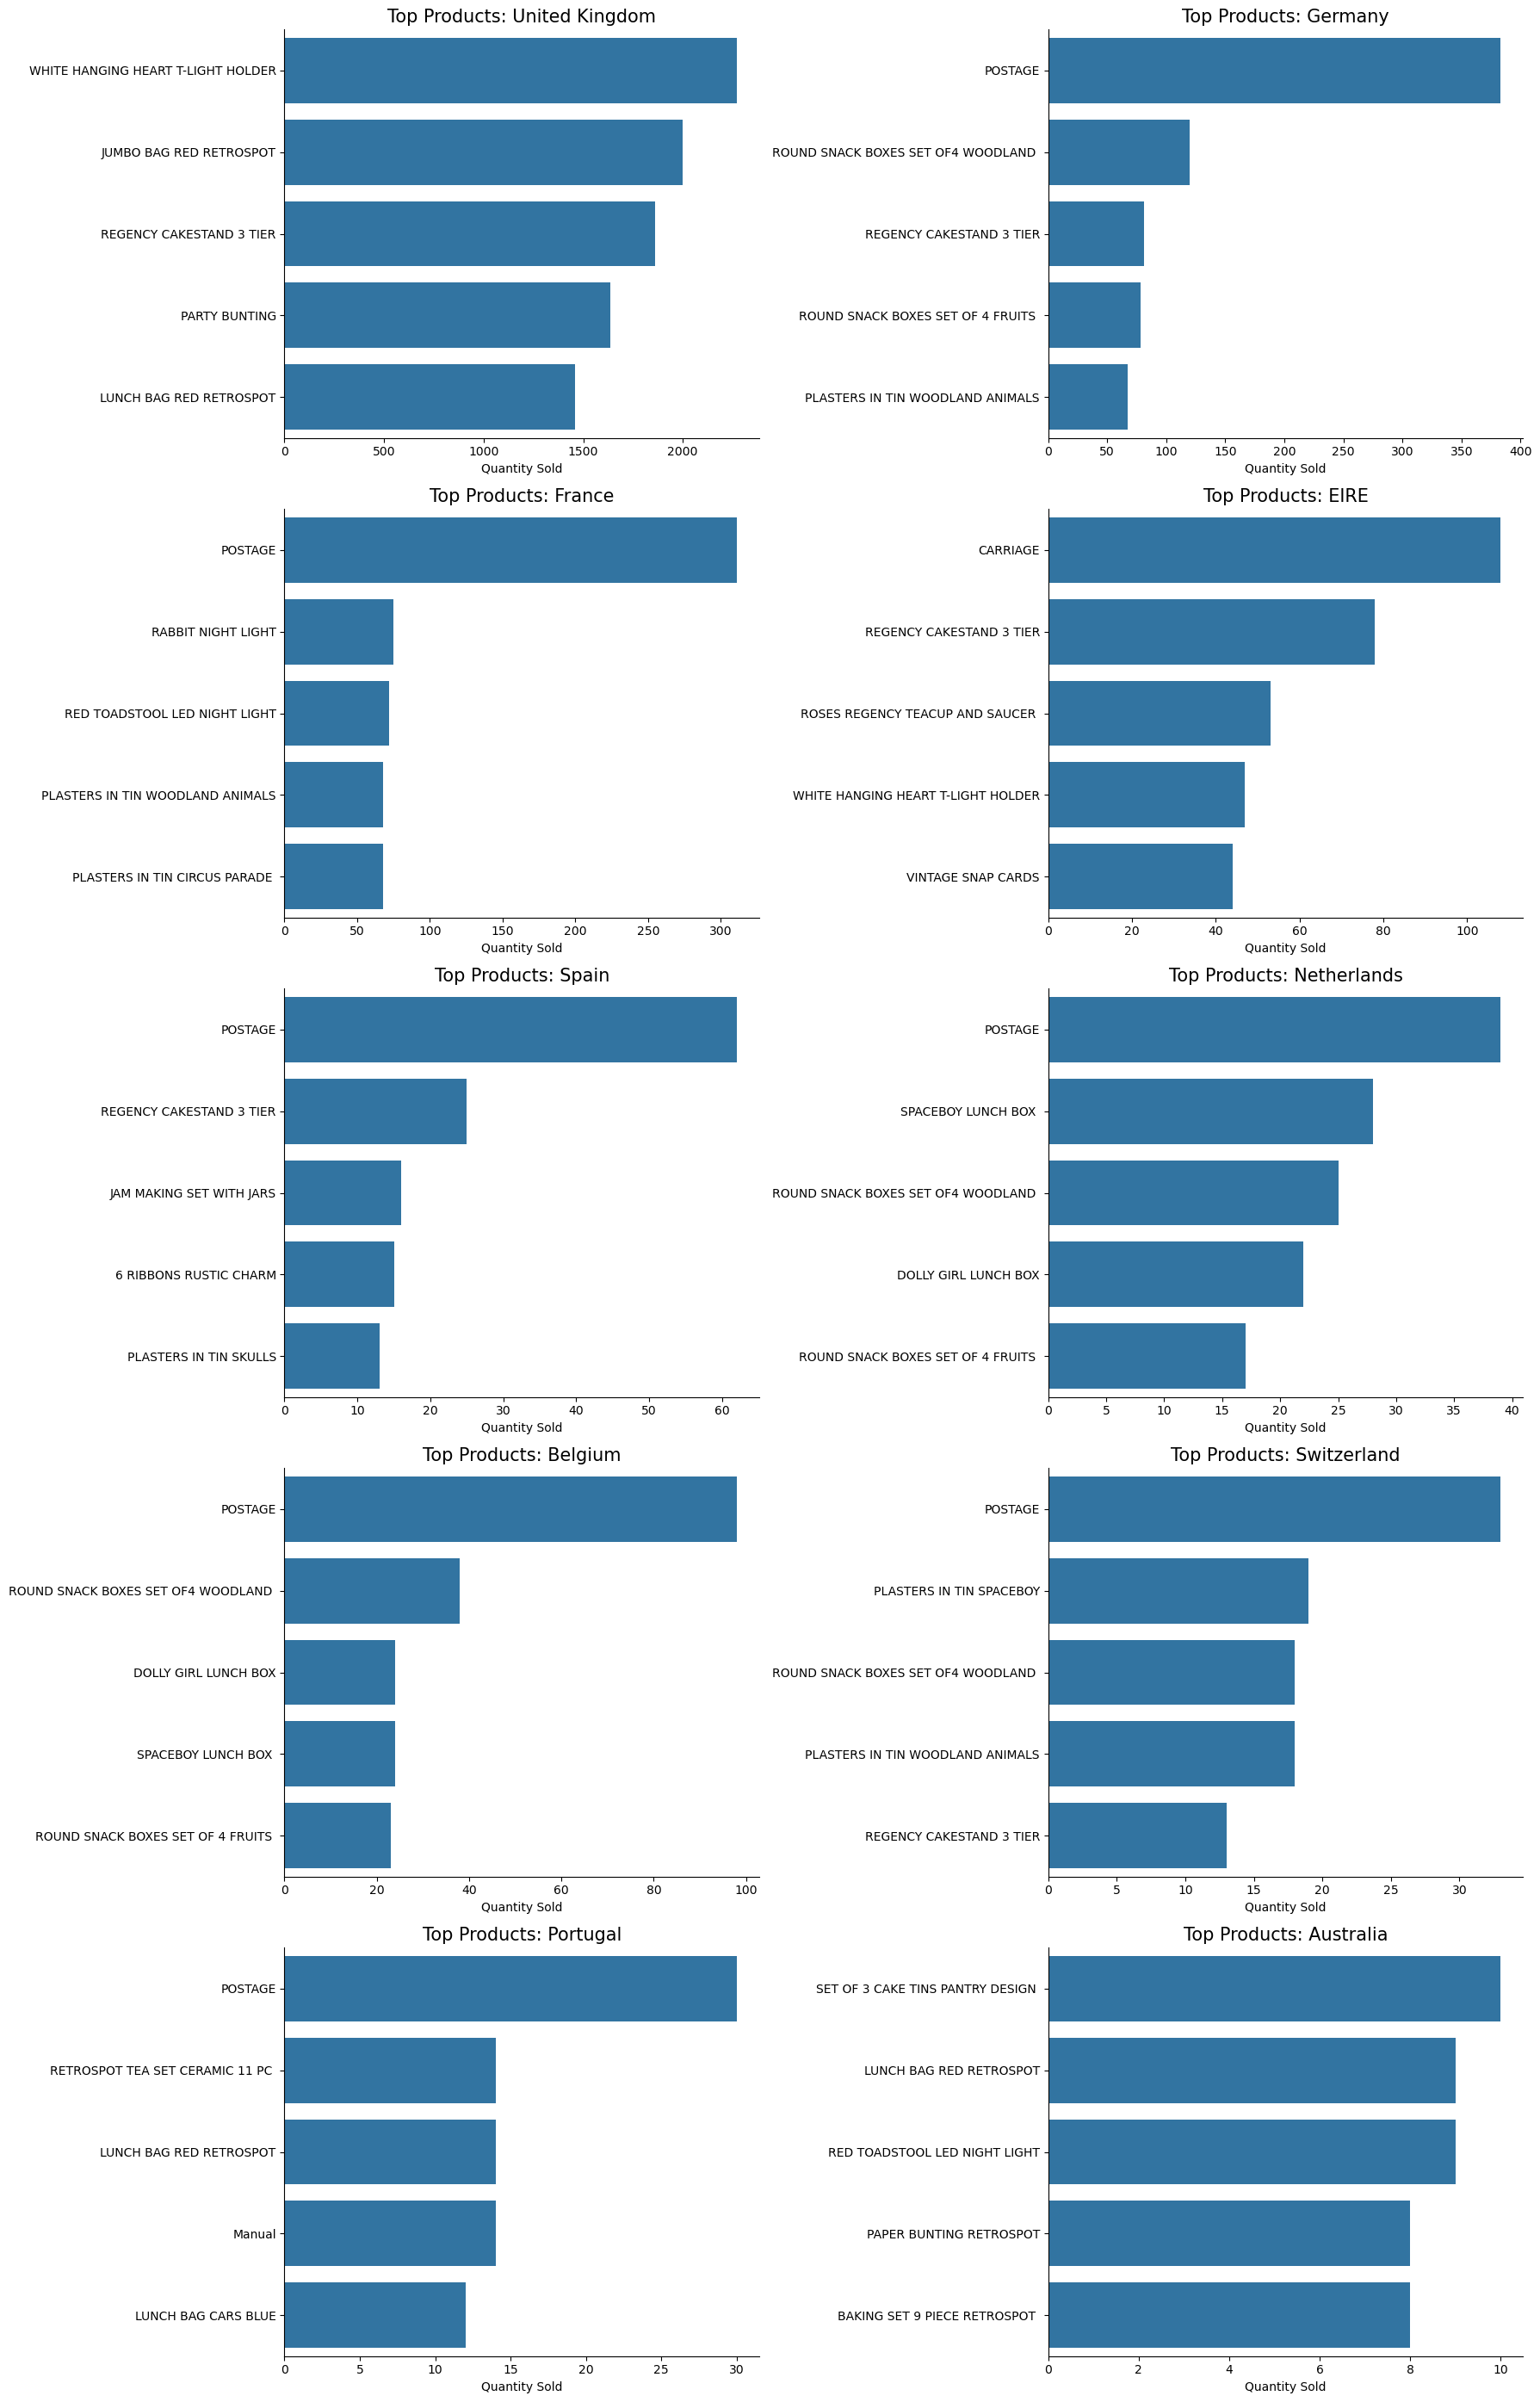

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a copy for analysis to protect the original dataframe
eda_df = df.copy()

# 2. Identify the Top 10 Countries from the copy
top_10_countries = eda_df['Country'].value_counts().nlargest(10).index

# 3. Setup the Plotting Grid (5 rows, 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(18, 28))
plt.subplots_adjust(hspace=0.5, wspace=0.7)
axes = axes.flatten()

# 4. Loop through each country
for i, country in enumerate(top_10_countries):
    # Get top 5 products for the specific country from the copy
    country_data = eda_df[eda_df['Country'] == country]
    top_products = country_data['Description'].value_counts().head(5)
    
    # Standard Barplot (removed palette and light-color styling)
    sns.barplot(x=top_products.values, 
                y=top_products.index, 
                ax=axes[i])
    
    # Standard titles and labels
    axes[i].set_title(f'Top Products: {country}', fontsize=15)
    axes[i].set_xlabel('Quantity Sold')
    axes[i].set_ylabel('')
    
    # Standard spine/frame removal
    sns.despine(ax=axes[i])

# 5. Display
plt.tight_layout()
plt.show()

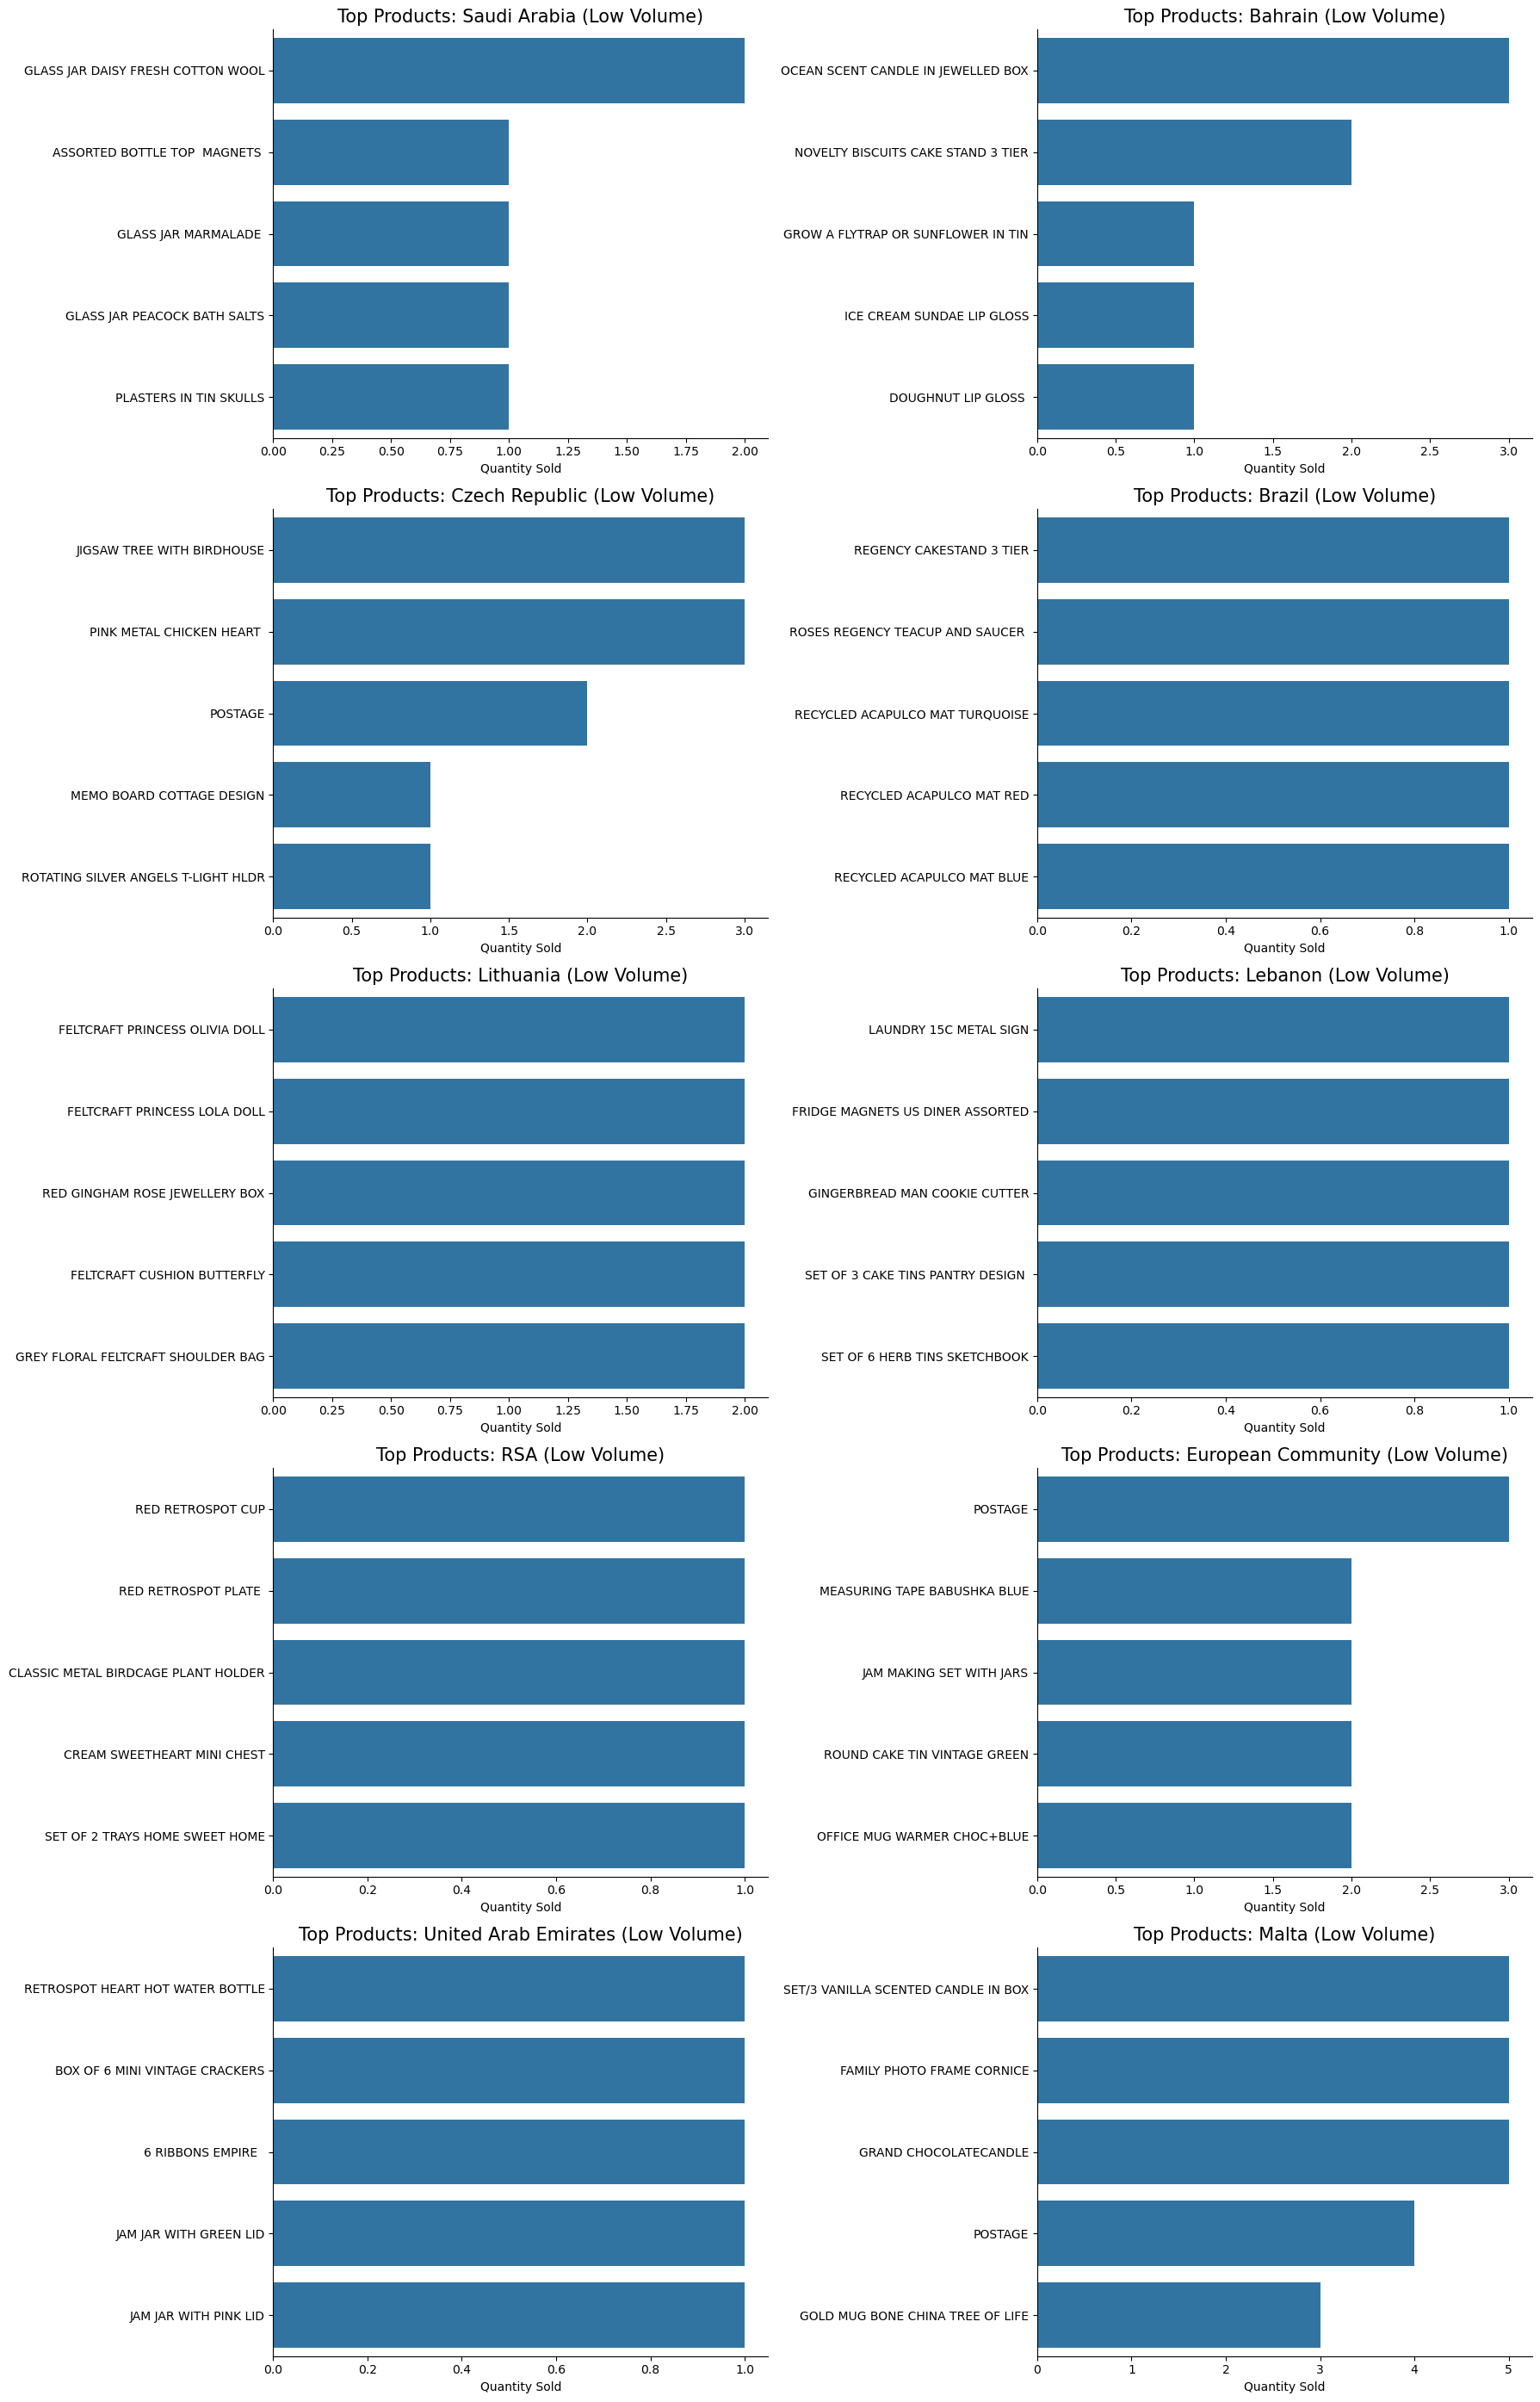

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a deep copy for analysis to protect the original dataframe
eda_df = df.copy()

# 2. Identify the Bottom 10 Countries by transaction count from the copy
bottom_10_countries = eda_df['Country'].value_counts().nsmallest(10).index

# 3. Setup the Plotting Grid (5 rows, 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(18, 28))
plt.subplots_adjust(hspace=0.5, wspace=0.7)
axes = axes.flatten()

# 4. Loop through each of the bottom 10 countries
for i, country in enumerate(bottom_10_countries):
    # Get top 5 products for this specific country from the copy
    country_data = eda_df[eda_df['Country'] == country]
    top_products = country_data['Description'].value_counts().head(5)
    
    # Standard Barplot (removed custom palette and edge styling)
    sns.barplot(x=top_products.values, 
                y=top_products.index, 
                ax=axes[i])
    
    # Standard titles and labels
    axes[i].set_title(f'Top Products: {country} (Low Volume)', fontsize=15)
    axes[i].set_xlabel('Quantity Sold')
    axes[i].set_ylabel('')
    
    # Standard spine removal
    sns.despine(ax=axes[i])

# 5. Final layout adjustment and display
plt.tight_layout()
plt.show()

### Final EDA Insights::

- **Top Selling Products:** The high frequency of "anchor items" like the White Hanging Heart T-Light Holder suggests a customer base driven by home-decor staples; these items are the primary entry points for new users.

- **Monthly Transaction Trends:** Revenue peaks significantly during November and December, indicating a heavy reliance on seasonal gift-giving cycles which must be accounted for in churn calculations.

- **Yearly Growth:** The transition from 2010 to 2011 shows a clear expansion in transaction volume, proving the business is successfully scaling and acquiring a larger pool of data for predictive modeling.

- **Quarterly Performance:** Q4 consistently outperforms other quarters by a wide margin, identifying it as the most critical period for customer retention and high-value acquisition.

- **Weekly Dynamics:** Transaction volume is remarkably consistent week-over-week during peak seasons, suggesting that once a customer is engaged, they maintain a high frequency of interaction.

- **Day of the Week Patterns:** Most purchasing activity occurs on Weekdays (especially Thursdays), implying a B2B or professional customer persona that primarily operates during standard business hours.

- **Geographic Concentration:** While the United Kingdom drives the vast majority of volume, international markets like Germany and France show stable, repeat-purchase behavior conducive to long-term loyalty.

### RFM Estimation - (Recency, Frequency, Monetary)

RFM stands for frequency, recency & monetary is a marketing technique which is used to find the best customers by analyzing their past purchasing behavior. It includes how frequently they have purchased, what is the total amount that they have spend so far, what was the last time they have purchased from our online store

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
import pandas as pd
import datetime as dt

# 1. Create a copy for analysis to protect the original dataframe
analysis_df = df.copy()
analysis_df['InvoiceDate'] = pd.to_datetime(analysis_df['InvoiceDate'])

# 2. Define Snapshot Date (1 day after the last transaction for accurate Recency)
snapshot_date = analysis_df['InvoiceDate'].max() + dt.timedelta(days=1)

# 3. Calculate RFM + T (Tenure)
# IMPORTANT: 'TotalAmount' is now 'mean' to get the Monetary Value per transaction
rfm_t = analysis_df.groupby('CustomerID').agg({
    'InvoiceDate': [
        lambda x: (snapshot_date - x.max()).days, # Recency
        lambda x: (snapshot_date - x.min()).days  # T (Tenure/Age)
    ],
    'InvoiceNo': 'nunique',                       # Frequency
    'TotalAmount': 'mean'                         # Monetary Value (Average)
})

# 4. Flatten multi-index columns
rfm_t.columns = ['Recency', 'T', 'Frequency', 'Monetary']

# 5. Filter for modeling: Monetary must be positive
rfm_t = rfm_t[rfm_t['Monetary'] > 0]

# Display the first few rows
rfm_t.head()

,Recency,T,Frequency,Monetary
CustomerID,,,,
12347.0,2,367,7,23.681319
12348.0,75,358,4,57.975484
12349.0,19,19,1,24.076027
12350.0,310,310,1,19.670588
12352.0,36,297,11,16.267474


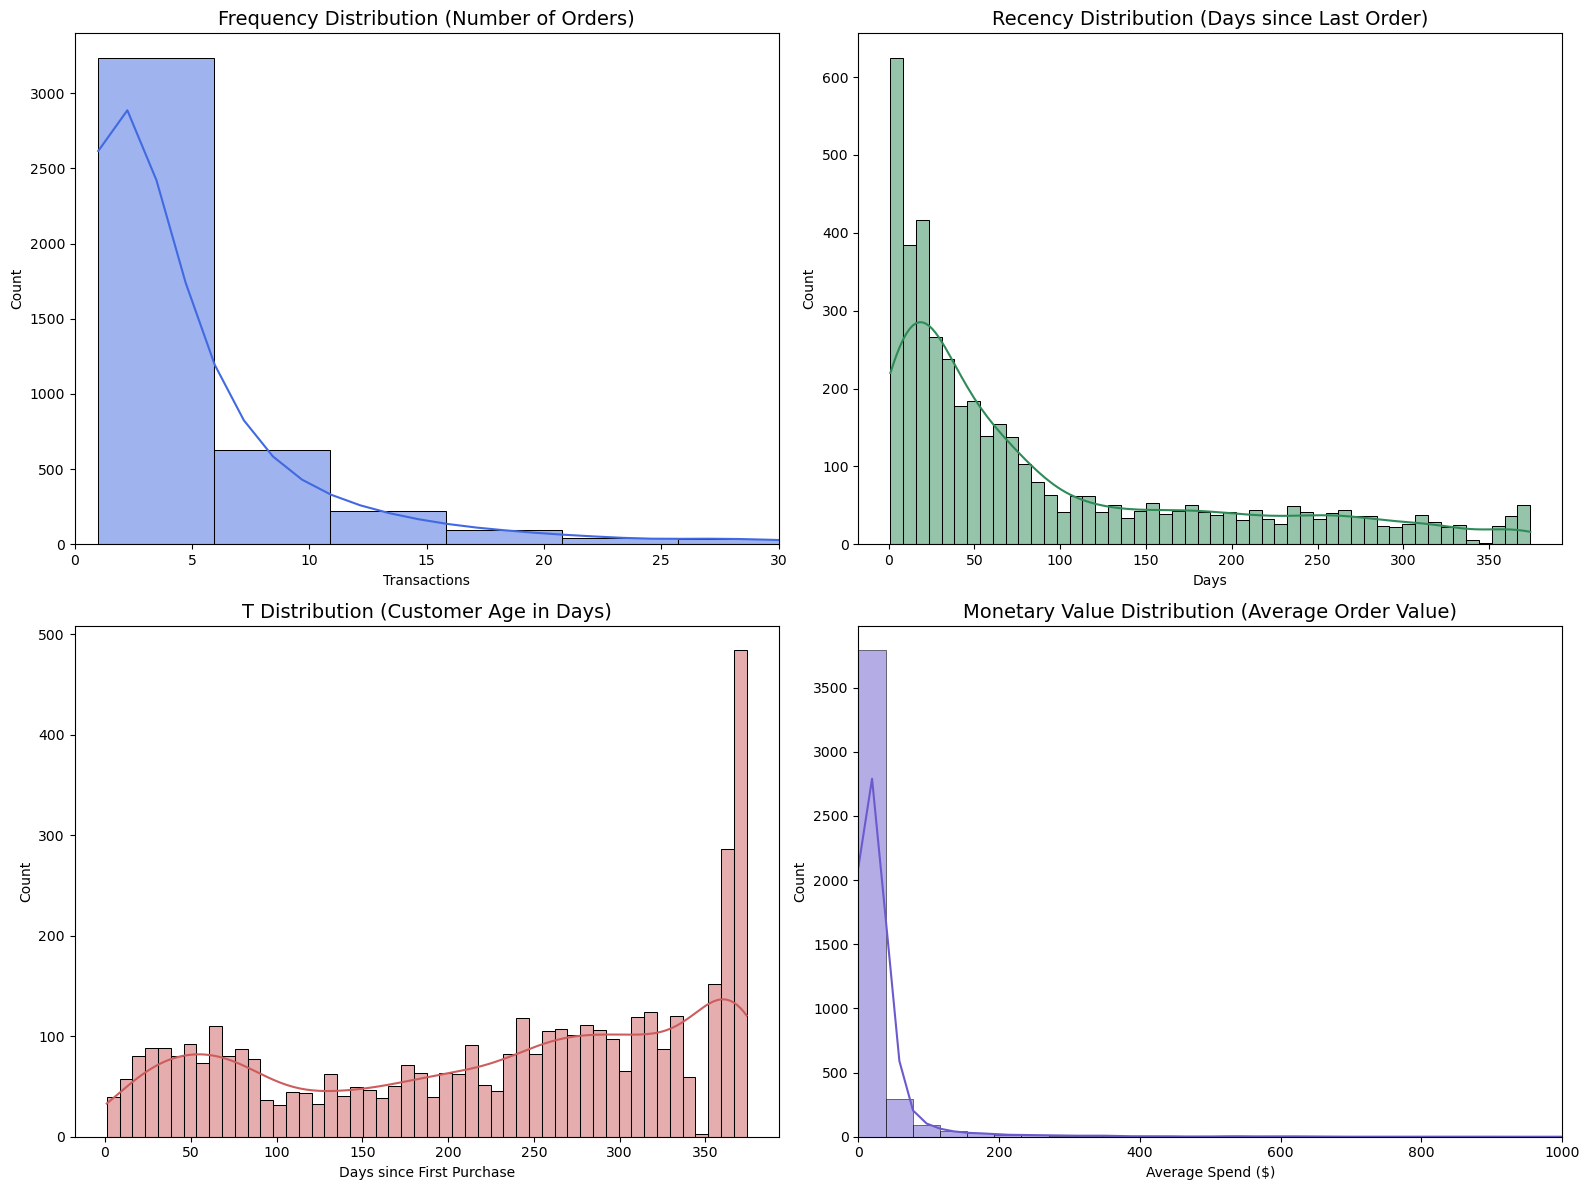

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup the Plotting Grid (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Frequency Plot (Number of Transactions)
sns.histplot(rfm_t['Frequency'], bins=50, ax=axes[0,0], kde=True, color='royalblue')
axes[0,0].set_title('Frequency Distribution (Number of Orders)', fontsize=14)
axes[0,0].set_xlim(0, 30) # Zoomed to see the bulk of the population
axes[0,0].set_xlabel('Transactions')

# 2. Recency Plot (Days since last order)
sns.histplot(rfm_t['Recency'], bins=50, ax=axes[0,1], kde=True, color='seagreen')
axes[0,1].set_title('Recency Distribution (Days since Last Order)', fontsize=14)
axes[0,1].set_xlabel('Days')

# 3. T (Tenure) Plot (Customer Age in Days)
sns.histplot(rfm_t['T'], bins=50, ax=axes[1,0], kde=True, color='indianred')
axes[1,0].set_title('T Distribution (Customer Age in Days)', fontsize=14)
axes[1,0].set_xlabel('Days since First Purchase')

# 4. Monetary Plot (Average Transaction Value)
sns.histplot(rfm_t['Monetary'], bins=100, ax=axes[1,1], kde=True, color='slateblue')
axes[1,1].set_title('Monetary Value Distribution (Average Order Value)', fontsize=14)
# Adjusting x-limit for Average Spend (typically 0 to 1000 is enough for retail)
axes[1,1].set_xlim(0, 1000) 
axes[1,1].set_xlabel('Average Spend ($)')

plt.tight_layout()
plt.show()

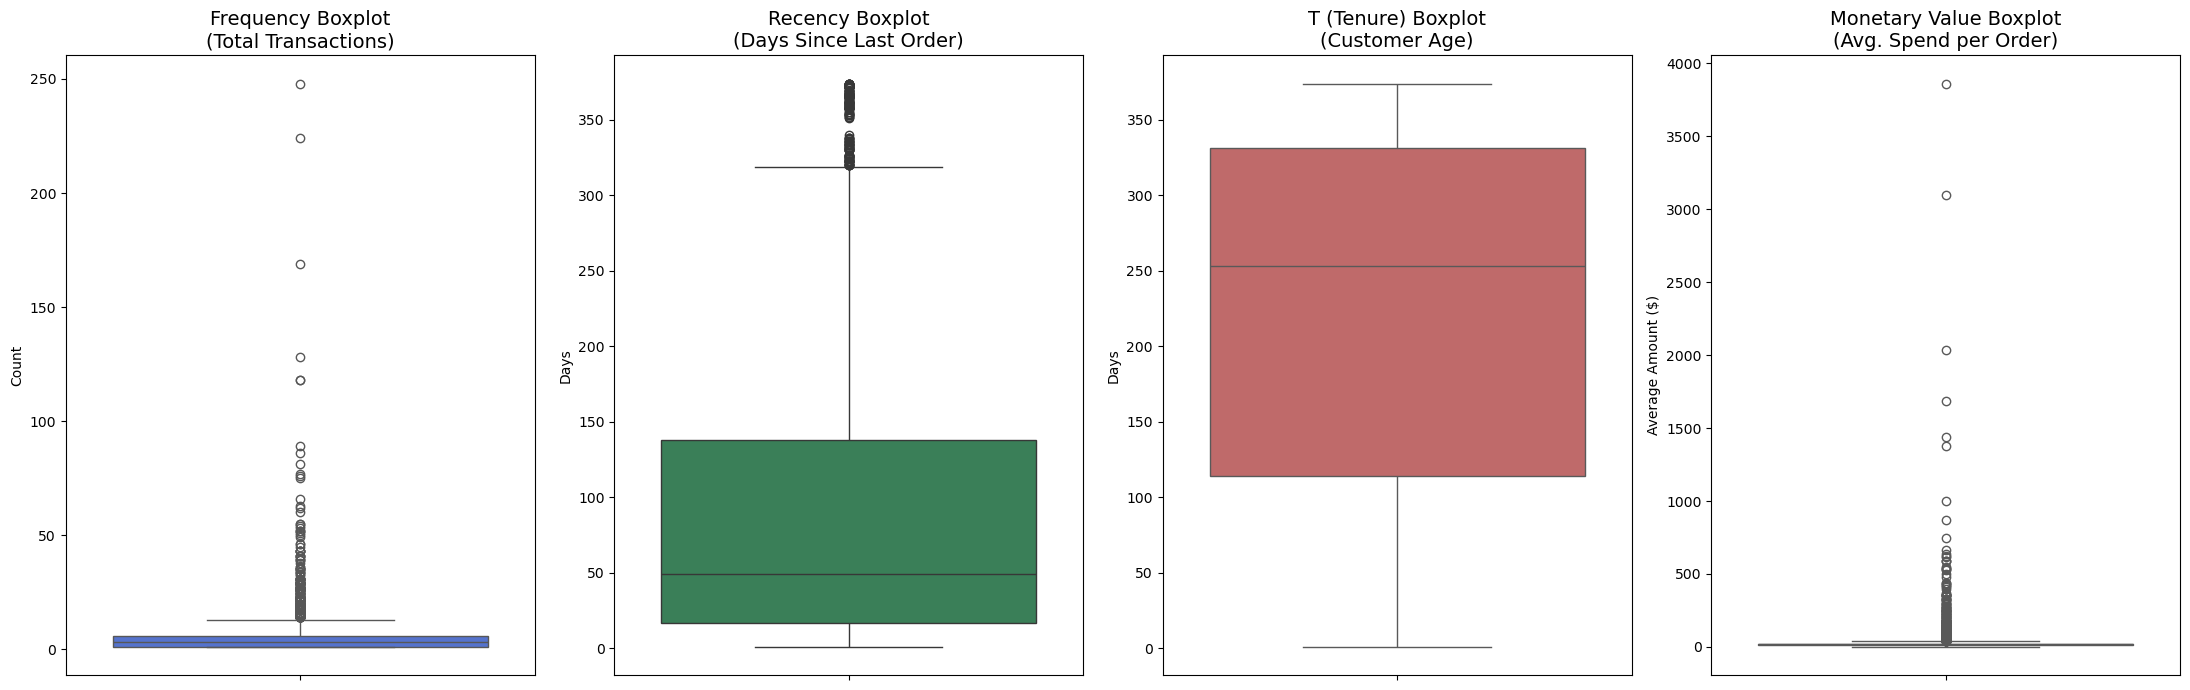

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(22, 7))

# Frequency Boxplot
sns.boxplot(y=rfm_t['Frequency'], ax=axes[0], color='royalblue')
axes[0].set_title('Frequency Boxplot\n(Total Transactions)', fontsize=14)
axes[0].set_ylabel('Count')

# Recency Boxplot
sns.boxplot(y=rfm_t['Recency'], ax=axes[1], color='seagreen')
axes[1].set_title('Recency Boxplot\n(Days Since Last Order)', fontsize=14)
axes[1].set_ylabel('Days')

# T (Tenure) Boxplot
sns.boxplot(y=rfm_t['T'], ax=axes[2], color='indianred')
axes[2].set_title('T (Tenure) Boxplot\n(Customer Age)', fontsize=14)
axes[2].set_ylabel('Days')

# Monetary Boxplot (Now representing Average Value)
sns.boxplot(y=rfm_t['Monetary'], ax=axes[3], color='slateblue')
axes[3].set_title('Monetary Value Boxplot\n(Avg. Spend per Order)', fontsize=14)
axes[3].set_ylabel('Average Amount ($)')

# Optional: If outliers in Monetary are too extreme to see the box, uncomment the line below:
# axes[3].set_ylim(0, rfm_t['Monetary'].quantile(0.95)) 

plt.tight_layout()
plt.show()

In [37]:
# 1. Generate the descriptive statistics
rfm_stats = rfm_t.describe().T

# 2. Add the total number of unique customers to the index name for clarity
customer_count = len(rfm_t)
print(f"Total Unique Customers analyzed: {customer_count}")

# 3. Display the summary table with professional formatting
# We use .round(2) to keep it clean for the report
rfm_stats_styled = rfm_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Display
rfm_stats_styled

Total Unique Customers analyzed: 4322


,count,mean,std,min,25%,50%,75%,max
Recency,4322.0,90.343591,99.133565,1.000000e+00,17.000000,49.500000,138.000000,374.0
T,4322.0,225.257057,118.325740,1.000000e+00,114.000000,253.000000,331.000000,374.0
Frequency,4322.0,5.115687,9.384459,1.000000e+00,1.000000,3.000000,6.000000,248.0
Monetary,4322.0,31.251943,104.908964,1.758769e-17,11.424882,17.012184,23.682205,3861.0


Now we have the data related to the RFM, we can now start with which model we can build to predict our customer's lifetime value. First we have to figure out either we have to do the prediction based on the customer level or the aggregate level.

For this analysis I am using to predict the customer lifetime value on the customer level rather than the aggregate or a cohort level.

Before building the model, we have to understand few of the most important things. We have to understand the business context that is the type of customers (contractual or non-contractual) and their purchase opportunity (discrete or continuous). The combination of both defines the business context which going to affect our CLV estimation approach.

Basic Terms:

- **Contractual Customers** - Contractual customers are subscription based customers. They churned on a defined date if they choose not to renew the subscription.

- **Non-Contractual Customers** - Non Contractual customers generally exist in e-commerce or retail business where there's no defined time period when the customer is going to churn.

- **Continuous Purchase** - It refers to the time period when the customer purchase a certain thing in any time period. Ex- Retail & E-commerce.

- **Discrete Purchase** - It refers to the time period when the customer purchase a certain thing on a specific time period. Ex - Netflix, Hulu, Hotstar Subscription.

For this analysis we are going to use the non-contractual with continuous purchase opportunity and the best fitted models we are going to use will be BG-NBD Model, Pareto-NBD Model, Modifies BG Model along with Gamma Gamma Distribution model for estimating the expected monetary value as a part of the customer lifetime value prediction.

## Beta Geo - Negative Binomial Distribution + Gamma Gamma Distribution Model

In [38]:
# Create a copy for the BG/NBD model to preserve original RFM data
model_df = rfm_t.copy()

In [39]:
# Preview the first few rows to verify the RFM-T structure 
# (Recency, Frequency, Tenure, and Monetary Value)
model_df.head()

,Recency,T,Frequency,Monetary
CustomerID,,,,
12347.0,2,367,7,23.681319
12348.0,75,358,4,57.975484
12349.0,19,19,1,24.076027
12350.0,310,310,1,19.670588
12352.0,36,297,11,16.267474


In [40]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.1)

In [41]:

# Then use the correct column names in the bgf.fit() function
# Assuming the correct column names are "Frequency", "Recency", and "T"
bgf.fit(model_df["Frequency"], model_df["Recency"], model_df["T"])

<lifetimes.BetaGeoFitter: fitted with 4322 subjects, a: 0.41, alpha: 0.27, b: 0.96, r: 0.25>

In [42]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.253582,0.004397,0.244964,0.262201
alpha,0.273954,0.010405,0.253560,0.294348
a,0.413857,0.010357,0.393557,0.434157
b,0.959015,0.021416,0.917040,1.000990


In [43]:
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4322 subjects, a: 0.41, alpha: 0.27, b: 0.96, r: 0.25>


<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

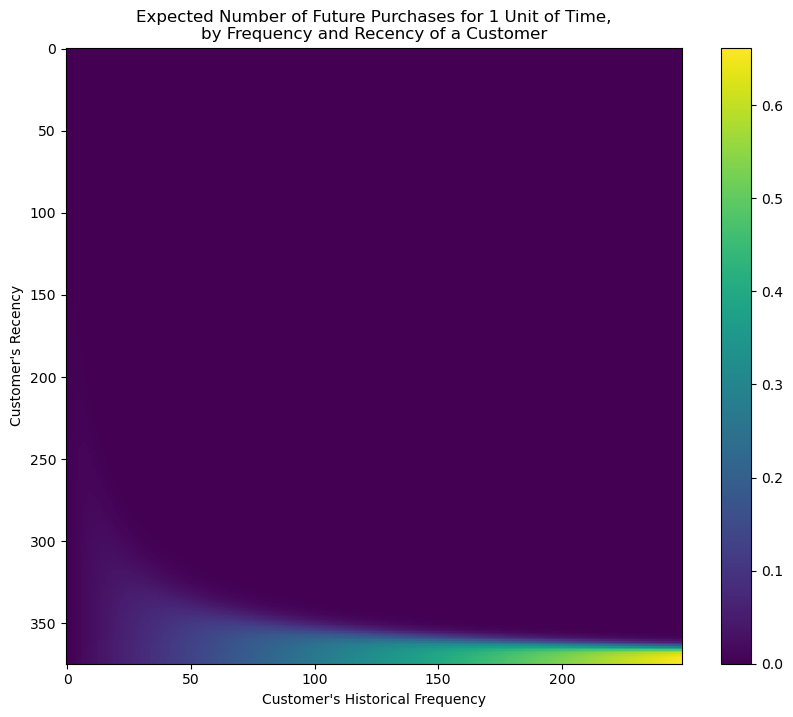

In [44]:
# Import the necessary library first
from lifetimes.plotting import plot_frequency_recency_matrix

# Then plot the frequency and recency matrix
plt.figure(figsize=(10,8))
plot_frequency_recency_matrix(bgf)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

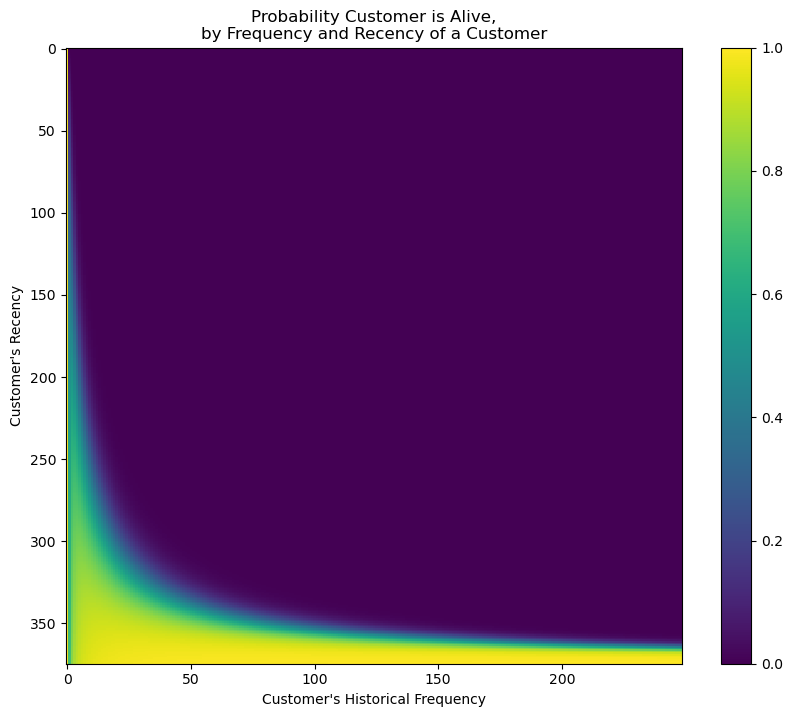

In [45]:
# Import the necessary function from the lifetimes library
from lifetimes.plotting import plot_probability_alive_matrix

# plotting the churn matrix
plt.figure(figsize=(10,8))
plot_probability_alive_matrix(bgf)

In [46]:
# Predicting Future Customer Behavior ---

# We set t=30 to predict the expected number of transactions in the next 30 days.
# This serves as a short-term forecast for inventory and cash flow planning.
t = 30 

model_df["expected_purchases_next_30_days"] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t, 
    model_df["Frequency"], 
    model_df["Recency"], 
    model_df["T"]
)

In [47]:
model_df.sort_values(by='expected_purchases_next_30_days').tail(5)

,Recency,T,Frequency,Monetary,expected_purchases_next_30_days
CustomerID,,,,,
14569.0,1,1,1,18.949167,8.445684
13298.0,1,1,1,180.000000,8.445684
14087.0,3,3,2,2.595286,9.294439
18139.0,17,18,8,51.810000,9.998575
16000.0,3,3,3,1377.077778,14.214719


Based on our analysis, these are the top customers who are likely to purchase

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

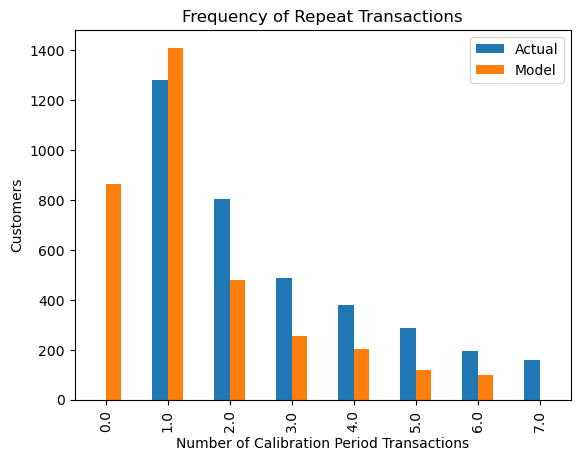

In [48]:
# Import the necessary library
from lifetimes.plotting import plot_period_transactions

# Now call the function
plot_period_transactions(bgf)

In [49]:
from lifetimes.utils import calibration_and_holdout_data

#  Ensure the date column is in the correct datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

summary_cal_holdout = calibration_and_holdout_data(
    df, 
    customer_id_col="CustomerID", 
    datetime_col="InvoiceDate", 
    calibration_period_end='2011-06-08',
    observation_period_end='2011-12-09'
)

In [50]:
summary_cal_holdout

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,0.0,0.0,141.0,0.0,184.0
12347.0,2.0,121.0,183.0,4.0,184.0
12348.0,2.0,110.0,174.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0
12352.0,3.0,34.0,112.0,3.0,184.0
...,...,...,...,...,...
18273.0,0.0,0.0,73.0,2.0,184.0
18277.0,0.0,0.0,134.0,1.0,184.0
18280.0,0.0,0.0,93.0,0.0,184.0


<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

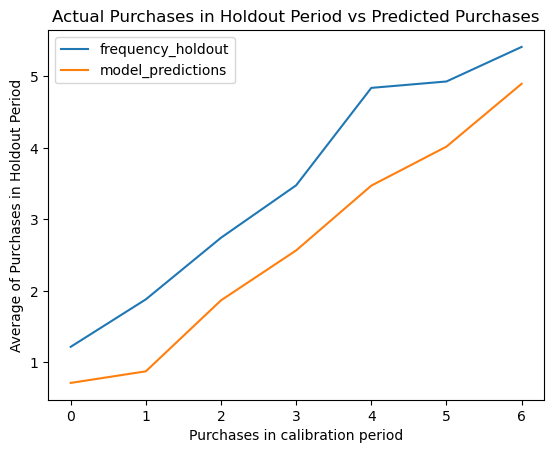

In [51]:
# Import the necessary library - most likely from lifetimes package
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

# Now use the function
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

In [52]:
summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,0.0,0.0,141.0,0.0,184.0
12347.0,2.0,121.0,183.0,4.0,184.0
12348.0,2.0,110.0,174.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0
12352.0,3.0,34.0,112.0,3.0,184.0


In [53]:
model_df["Actual_30"] = model_df["Frequency"]/model_df["Recency"]*30

In [54]:
model_df.head()

,Recency,T,Frequency,Monetary,expected_purchases_next_30_days,Actual_30
CustomerID,,,,,,
12347.0,2,367,7,23.681319,9.417347e-16,105.000000
12348.0,75,358,4,57.975484,4.342443e-03,1.600000
12349.0,19,19,1,24.076027,1.105718e+00,1.578947
12350.0,310,310,1,19.670588,8.312699e-02,0.096774
12352.0,36,297,11,16.267474,1.544056e-09,9.166667


In [55]:
model_df = model_df.fillna(value = 0) #filling null values with 0

In [56]:
#calculating the prediction error for the 30 days purchase prediction
model_df["Error"] = model_df["Actual_30"] - model_df["expected_purchases_next_30_days"]

In [57]:
# Import the mean_squared_error function from sklearn.metrics
from sklearn.metrics import mean_squared_error

# Now use the function
mse = mean_squared_error(model_df["Actual_30"], model_df["expected_purchases_next_30_days"])

In [58]:
# Import the sqrt function from math module
from math import sqrt

print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % model_df["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 44272.86479531385
Average Error:  31.612985071722143
Root Mean Squared Error: 210.41118030017762


In [59]:
#Purchase Prediction

bgf_mse_purchase_30 = mean_squared_error(model_df["Actual_30"],model_df["expected_purchases_next_30_days"])
bgf_rmse_purchase_30 = sqrt(bgf_mse_purchase_30)  # Fixed variable name to match the one defined above
bgf_avg_error_purchase_30 = model_df["Error"].mean()

- **Note:** This error is based on the 30 days period, it might vary as we adjust the lookup period

In [60]:
model_df.head()

,Recency,T,Frequency,Monetary,expected_purchases_next_30_days,Actual_30,Error
CustomerID,,,,,,,
12347.0,2,367,7,23.681319,9.417347e-16,105.000000,105.000000
12348.0,75,358,4,57.975484,4.342443e-03,1.600000,1.595658
12349.0,19,19,1,24.076027,1.105718e+00,1.578947,0.473229
12350.0,310,310,1,19.670588,8.312699e-02,0.096774,0.013647
12352.0,36,297,11,16.267474,1.544056e-09,9.166667,9.166667


In [61]:
#Filtering the data where we have the values of 0 or less than 0.
res_summary = model_df[model_df["Frequency"] > 0]

In [62]:
final_summary = res_summary[res_summary["Monetary"] > 0]

<Axes: >

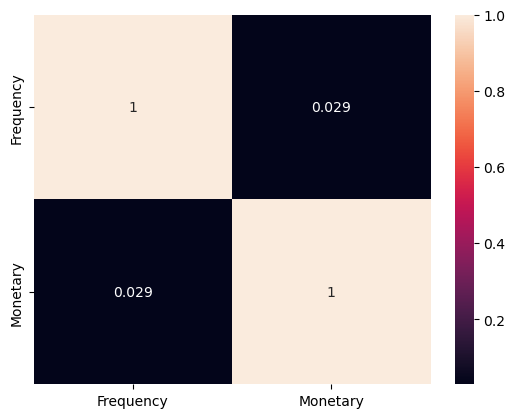

In [63]:
sns.heatmap(final_summary[["Frequency", "Monetary"]].corr(), annot = True)

To proceed with the Gamma Gamma Model we have to check for the assumption whether the frequency and monetary values are intercorrelated or not. As we can see here, the correlation between the frequency and monetary value is pretty low so we can go ahead to build Gamma Gamma Model.

In [64]:
# Import the lifetimes module first
import lifetimes

# Now you can use the module
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [65]:
ggf.fit(final_summary["Frequency"], final_summary["Monetary"])

<lifetimes.GammaGammaFitter: fitted with 4322 subjects, p: 1.15, q: 2.62, v: 37.21>

In [66]:
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,1.147511,0.037048,1.074897,1.220125
q,2.621547,0.078136,2.468402,2.774693
v,37.209184,2.032158,33.226155,41.192214


In [67]:
model_df

,Recency,T,Frequency,Monetary,expected_purchases_next_30_days,Actual_30,Error
CustomerID,,,,,,,
12347.0,2,367,7,23.681319,9.417347e-16,105.000000,105.000000
12348.0,75,358,4,57.975484,4.342443e-03,1.600000,1.595658
12349.0,19,19,1,24.076027,1.105718e+00,1.578947,0.473229
12350.0,310,310,1,19.670588,8.312699e-02,0.096774,0.013647
12352.0,36,297,11,16.267474,1.544056e-09,9.166667,9.166667
...,...,...,...,...,...,...,...
18280.0,278,278,1,18.060000,9.249746e-02,0.107914,0.015416
18281.0,181,181,1,11.545714,1.405320e-01,0.165746,0.025214
18282.0,8,126,3,13.584615,7.445564e-04,11.250000,11.249255


In [68]:
model_ = model_df[(model_df["Monetary"] > 0) & (model_df["Frequency"] > 0)]

In [69]:
model_.shape


(4322, 7)

In [70]:
model_["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(model_["Frequency"], 
                                                                        model_["Monetary"])

In [71]:
model_

,Recency,T,Frequency,Monetary,expected_purchases_next_30_days,Actual_30,Error,Expected_Avg_Sales
CustomerID,,,,,,,,
12347.0,2,367,7,23.681319,9.417347e-16,105.000000,105.000000,24.126472
12348.0,75,358,4,57.975484,4.342443e-03,1.600000,1.595658,49.714791
12349.0,19,19,1,24.076027,1.105718e+00,1.578947,0.473229,25.396884
12350.0,310,310,1,19.670588,8.312699e-02,0.096774,0.013647,23.571249
12352.0,36,297,11,16.267474,1.544056e-09,9.166667,9.166667,17.413168
...,...,...,...,...,...,...,...,...
18280.0,278,278,1,18.060000,9.249746e-02,0.107914,0.015416,22.903813
18281.0,181,181,1,11.545714,1.405320e-01,0.165746,0.025214,20.204262
18282.0,8,126,3,13.584615,7.445564e-04,11.250000,11.249255,17.666275


In [72]:
print("Expected Average Sales: %s" % model_["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % model_["Monetary"].mean())
print("Difference: %s" % (model_["Monetary"].mean() - model_["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(model_["Monetary"], model_["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(model_["Monetary"], model_["Expected_Avg_Sales"])))

Expected Average Sales: 29.13228408069675
Actual Average Sales: 31.251943407284706
Difference: 2.119659326587957
Mean Squared Error: 2919.0180739166667
Root Mean Squared Error: 54.027937901762144


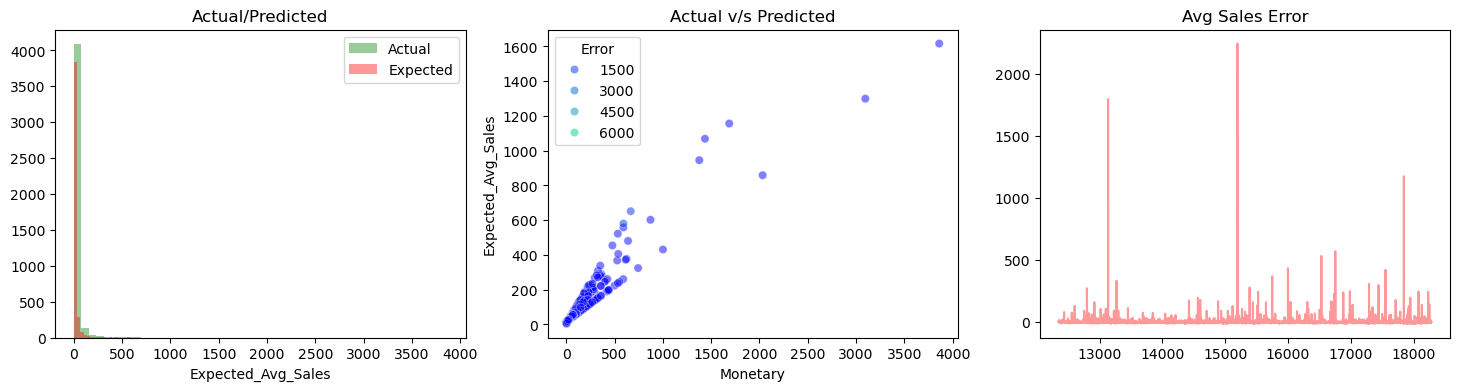

In [73]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(model_["Monetary"], color = "g", kde = False)
sns.distplot(model_["Expected_Avg_Sales"], color = "r", kde = False)
plt.title("Actual/Predicted")
plt.legend(["Actual", "Expected"])
plt.subplot(132)
# Fixed: Use x and y parameters instead of positional arguments
sns.scatterplot(x=model_["Monetary"], y=model_["Expected_Avg_Sales"], alpha=0.5, hue=model_["Error"], palette="winter")
plt.title("Actual v/s Predicted")
plt.subplot(133)
plt.plot(model_["Monetary"]-model_["Expected_Avg_Sales"], color = 'r', alpha = 0.4)
plt.title("Avg Sales Error")
plt.show()

In [74]:
model_["clv_predicted"] = ggf.customer_lifetime_value(bgf,
                                                       model_["Frequency"],
                                                       model_["Recency"],
                                                       model_["T"],
                                                       model_["Monetary"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [75]:
model_.head()

,Recency,T,Frequency,Monetary,expected_purchases_next_30_days,Actual_30,Error,Expected_Avg_Sales,clv_predicted
CustomerID,,,,,,,,,
12347.0,2,367,7,23.681319,9.417347e-16,105.000000,105.000000,24.126472,4.493123e-13
12348.0,75,358,4,57.975484,4.342443e-03,1.600000,1.595658,49.714791,4.257779e+00
12349.0,19,19,1,24.076027,1.105718e+00,1.578947,0.473229,25.396884,2.976157e+02
12350.0,310,310,1,19.670588,8.312699e-02,0.096774,0.013647,23.571249,3.792701e+01
12352.0,36,297,11,16.267474,1.544056e-09,9.166667,9.166667,17.413168,5.117317e-07


In [76]:
#adding a 5% of profit margin
model_["CLV"] = model_["clv_predicted"]*0.05

In [77]:
# Use double brackets to keep it as a DataFrame format
model_.loc[[12360.0]]

,Recency,T,Frequency,Monetary,expected_purchases_next_30_days,Actual_30,Error,Expected_Avg_Sales,clv_predicted,CLV
CustomerID,,,,,,,,,,
12360.0,52,201,3,20.636124,0.038513,1.730769,1.692256,22.45985,15.324519,0.766226


In [78]:
model_.sort_values(by = "Error", ascending = False)

,Recency,T,Frequency,Monetary,expected_purchases_next_30_days,Actual_30,Error,Expected_Avg_Sales,clv_predicted,CLV
CustomerID,,,,,,,,,,
14911.0,1,373,248,22.458516,0.000000e+00,7440.000000,7440.00000,22.480460,0.000000e+00,0.000000e+00
12748.0,1,374,224,6.262839,0.000000e+00,6720.000000,6720.00000,6.388649,0.000000e+00,0.000000e+00
14606.0,1,373,128,4.210586,0.000000e+00,3840.000000,3840.00000,4.452132,0.000000e+00,0.000000e+00
15311.0,1,374,118,23.853609,3.720015e-289,3540.000000,3540.00000,23.882933,1.758388e-286,8.791942e-288
17841.0,2,373,169,5.053336,0.000000e+00,2535.000000,2535.00000,5.229780,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
16583.0,374,374,1,16.675000,6.912352e-02,0.080214,0.01109,22.329863,3.085101e+01,1.542551e+00
17968.0,374,374,1,3.262941,6.912352e-02,0.080214,0.01109,16.771842,2.317203e+01,1.158602e+00
14729.0,374,374,1,4.415352,6.912352e-02,0.080214,0.01109,17.249406,2.383184e+01,1.191592e+00


In [79]:
actual = model_["Monetary"]*model_["Actual_30"]
predicted = model_["Expected_Avg_Sales"]*model_["expected_purchases_next_30_days"]
error = actual - predicted
result = pd.DataFrame([actual, predicted, error], index = ["Actual", "Predicted", "Error"]).T

In [80]:
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result["Actual"], result["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: 1494.2627670824331
Mean Squared Error: 588504613.5426551
Root Mean Squared Error: 24259.114030455752


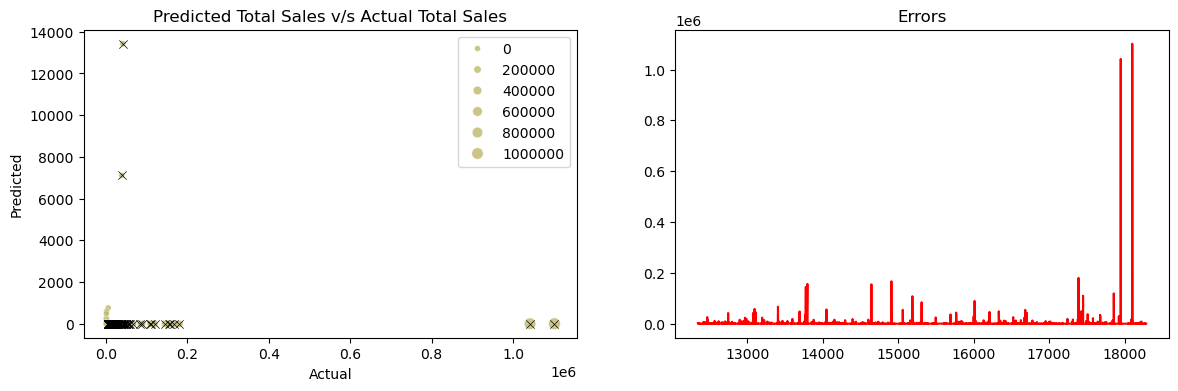

In [81]:
#Predicted v/s Actual
plt.figure(figsize=(14,4))
plt.subplot(121)
# Fix: Use x and y parameters instead of positional arguments
sns.scatterplot(x=result["Actual"], y=result["Predicted"], size=result["Error"], color="darkkhaki", alpha=0.8, marker='o')
# Fix: Use x and y parameters for the second scatterplot as well
sns.scatterplot(x=(result[result["Error"] > 5000]["Actual"]), y=(result[result["Error"] > 5000]["Predicted"]), color="k", marker="x")
plt.title("Predicted Total Sales v/s Actual Total Sales")
plt.subplot(122)
plt.plot(result["Error"], color="r")
plt.title("Errors")
plt.show()

### Pareto - Negative Binom Distribution + Gamma Gamma Distribution Model

In [82]:
model_pnbd = rfm_t.copy()

In [83]:
model_pnbd.shape


(4322, 4)

In [ ]:
# Import the necessary library first
from lifetimes import ParetoNBDFitter

# Now use the imported class
pareto_nbd = ParetoNBDFitter(penalizer_coef=0.0)
pareto_nbd.fit(model_pnbd["Frequency"], model_pnbd["Recency"], model_pnbd["T"])

In [ ]:
plt.figure(figsize=(9,6))
plot_frequency_recency_matrix(pareto_nbd)

In [ ]:
plt.figure(figsize=(9,6))
plot_probability_alive_matrix(pareto_nbd)

In [ ]:
model_pnbd["p_not_alive"] = 1-pareto_nbd.conditional_probability_alive(model_pnbd["Frequency"], model_pnbd["Recency"], model_pnbd["T"])
model_pnbd["p_alive"] = pareto_nbd.conditional_probability_alive(model_pnbd["Frequency"], model_pnbd["Recency"], model_pnbd["T"])

In [ ]:
t = 30
model_pnbd["expected_purchases"] = pareto_nbd.conditional_expected_number_of_purchases_up_to_time(t, model_pnbd["Frequency"], model_pnbd["Recency"], model_pnbd["T"])

In [ ]:
model_pnbd.sort_values(by = "expected_purchases").tail(5)

In [ ]:
plot_period_transactions(pareto_nbd)

In [ ]:
from lifetimes.utils import calibration_and_holdout_data

# Ensure InvoiceDate is in the correct datetime format first
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create the split
# Calibration (Train): Start of data to 2011-06-08
# Holdout (Test): 2011-06-09 to 2011-12-09
summary_cal_holdout = calibration_and_holdout_data(
    df, 
    customer_id_col = "CustomerID",      # Updated to match standard dataframe naming
    datetime_col = "InvoiceDate", 
    calibration_period_end = '2011-06-08',
    observation_period_end = '2011-12-09'
)

# Preview the new structure
summary_cal_holdout.head()

In [ ]:
pareto_nbd.fit(summary_cal_holdout["frequency_cal"],
               summary_cal_holdout["recency_cal"],
               summary_cal_holdout["T_cal"])

In [ ]:
plot_calibration_purchases_vs_holdout_purchases(pareto_nbd, summary_cal_holdout)

In [ ]:
model_pnbd["Actual_30_p"] = model_pnbd["Frequency"]/model_pnbd["Recency"]*30

In [ ]:
model_pnbd["Actual_30_p"].fillna(0, inplace = True)

In [ ]:
model_pnbd["p_error"] = model_pnbd["Actual_30_p"]-model_pnbd["expected_purchases"]

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Drop NaN values before calculating metrics
model_pnbd_clean = model_pnbd.dropna(subset=["Actual_30_p", "expected_purchases"])

# Calculate metrics using the cleaned data
print("Mean Squared Error: %s" % mean_squared_error(
    model_pnbd_clean["Actual_30_p"], 
    model_pnbd_clean["expected_purchases"]
))

print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(
    model_pnbd_clean["Actual_30_p"], 
    model_pnbd_clean["expected_purchases"]
)))

# For the average purchase error, handle NaN values
if "p_error" in model_pnbd.columns:
    print("Average Purchase Error: %s" % model_pnbd["p_error"].mean(skipna=True))
else:
    # If p_error doesn't exist, calculate it
    model_pnbd_clean["p_error"] = model_pnbd_clean["expected_purchases"] - model_pnbd_clean["Actual_30_p"]
    print("Average Purchase Error: %s" % model_pnbd_clean["p_error"].mean())

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Drop NaN values before calculating metrics
model_pnbd_clean = model_pnbd.dropna(subset=['Actual_30_p', 'expected_purchases'])

# Calculate metrics using the cleaned data
pareto_mse_purchase = mean_squared_error(model_pnbd_clean["Actual_30_p"], model_pnbd_clean["expected_purchases"])
pareto_rmse_purchase = sqrt(pareto_mse_purchase)  # More efficient to reuse MSE

# For the mean error, handle NaN values
model_pnbd['p_error'] = model_pnbd['Actual_30_p'] - model_pnbd['expected_purchases']
pareto_avg_error_purchase = model_pnbd['p_error'].mean(skipna=True)  # skipna=True ignores NaN values

# Alternatively, you could fill NaN values with a specific value like 0
# model_pnbd = model_pnbd.fillna(0)
# Then proceed with your original calculations

In [ ]:
sns.scatterplot(x=model_pnbd["Actual_30_p"], y=model_pnbd["expected_purchases"], size=model_pnbd["p_error"])
plt.title("Actual Purchase v/s Predicted Purchase")
plt.show()

In [ ]:
model_copy = model_pnbd.copy()

In [ ]:
model_copy = model_copy[(model_copy["Frequency"] > 0) & (model_copy["Monetary"] > 0)]

In [ ]:
sns.heatmap(model_copy[["Frequency", "Monetary"]].corr(), annot = True)

In [ ]:
ggf_p = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [ ]:
ggf_p.fit(model_copy["Frequency"], model_copy["Monetary"])

In [ ]:
ggf_p.summary

In [ ]:
model_copy["expected_avg_sales_p"] = ggf_p.conditional_expected_average_profit(model_copy["Frequency"],
                                                                        model_copy["Monetary"])

In [ ]:
model_copy.head()

In [ ]:
avg_purchase_error = model_copy["Monetary"].mean() - model_copy["expected_avg_sales_p"].mean()

In [ ]:
print("Acutal Avg Sales: %s" % model_copy["Monetary"].mean())
print("Predicted Avg Sales: %s" % model_copy["expected_avg_sales_p"].mean())
print("Mean Sqaured Error: %s" % mean_squared_error(model_copy["Monetary"], model_copy["expected_avg_sales_p"]))
print("Root Mean Sqaured Error: %s" % sqrt(mean_squared_error(model_copy["Monetary"], model_copy["expected_avg_sales_p"])))
print("Avg Sales Error: %s" % avg_purchase_error)

In [ ]:
actual = model_copy["Actual_30_p"] * model_copy["Monetary"]
predicted = model_copy["expected_purchases"] * model_copy["expected_avg_sales_p"]

In [ ]:
error = actual - predicted

In [ ]:
result_p = pd.DataFrame([actual, predicted, error], index = ["Actual", "Predicted", "Error"]).T

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

# 1. Clean the data: Replace NaN with 0 or drop them
# Usually, a NaN in 'Actual' or 'Predicted' means 0 transactions happened
result_p = result_p.fillna(0)

# 2. Calculate metrics
mse = mean_squared_error(result_p["Actual"], result_p["Predicted"])
rmse = sqrt(mse)
avg_error = result_p["Error"].mean()

# 3. Print the results
print(f"Average Error: {avg_error:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Clean data and calculate Absolute Error for the bars
plot_data = result_p.fillna(0).copy()
plot_data["Abs_Error"] = plot_data["Error"].abs() # This fixes the ValueError

plt.figure(figsize=(14, 12))

# Subplot 1: Prediction v/s Actual
plt.subplot(321)
# Use Abs_Error for yerr
plt.errorbar(plot_data["Actual"], plot_data["Predicted"], yerr=plot_data["Abs_Error"], 
             fmt='o', color='darkcyan', ecolor='black', elinewidth=0.5, capsize=0, alpha=0.3)
plt.plot([0, plot_data["Actual"].max()], [0, plot_data["Actual"].max()], '--r', label='Perfect Match')
plt.title("Prediction v/s Actual (with Absolute Error Bars)")
plt.xlabel("Actual Transactions")
plt.ylabel("Predicted Transactions")

# Subplot 2: Error Trace (Keep negative values here to show bias!)
plt.subplot(322)
plt.plot(plot_data["Error"], color='r', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residual Error (Actual - Predicted)")

# Subplot 3 & 4: Boxplots
plt.subplot(323)
sns.boxplot(x=plot_data["Predicted"], color='skyblue')
plt.title("Distribution of Predictions")

plt.subplot(324)
sns.boxplot(x=plot_data["Actual"], color='lightgreen')
plt.title("Distribution of Actuals")

# Subplot 5: Distribution Comparison (Modern KDE)
plt.subplot(3, 2, (5, 6))
sns.kdeplot(plot_data["Predicted"], label="Predicted", fill=True, color="dodgerblue")
sns.kdeplot(plot_data["Actual"], label="Actual", fill=True, color="orange")
plt.title("Overall Model Fit: Density Comparison")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model_copy["predicted_clv_p"] = ggf_p.customer_lifetime_value(pareto_nbd,
                                                       model_copy["Frequency"],
                                                       model_copy["Recency"],
                                                       model_copy["T"],
                                                       model_copy["Monetary"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [ ]:
model_copy.shape

In [ ]:
model_copy["CLV_p"] = model_copy["predicted_clv_p"]*0.05

In [ ]:
model_copy.head()

In [ ]:
# creating a copy for our new model
model_mbg = rfm_t.copy()

In [ ]:
model_mbg.head()

In [ ]:
from lifetimes import ModifiedBetaGeoFitter
mbg = ModifiedBetaGeoFitter(penalizer_coef = 0.0)
mbg.fit(model_mbg["Frequency"], model_mbg["Recency"], model_mbg["T"])

In [ ]:
mbg.summary

In [ ]:
plt.figure(figsize=(9,6))
plot_frequency_recency_matrix(mbg)

In [ ]:
plt.figure(figsize=(9,6))
plot_probability_alive_matrix(mbg)

In [ ]:
t = 30
model_mbg["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, model_mbg["Frequency"], model_mbg["Recency"], model_mbg["T"])

In [ ]:
model_mbg

In [ ]:
plot_period_transactions(mbg)

In [ ]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(df, "CustomerID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [ ]:
mbg.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

In [ ]:
plot_calibration_purchases_vs_holdout_purchases(mbg, summary_cal_holdout)

In [ ]:
model_mbg["Actual_30"] = model_mbg["Frequency"]/model_mbg["Recency"]*30

In [ ]:
model_mbg = model_mbg.fillna(value = 0)

In [ ]:
model_mbg.head()

In [ ]:
model_mbg["Error"] = model_mbg["Actual_30"] - model_mbg["predicted_purchases"]

In [ ]:
mse = mean_squared_error(model_mbg["Actual_30"],model_mbg["predicted_purchases"])

In [ ]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % model_mbg["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

In [ ]:
mbg_mse_purchase = mean_squared_error(model_mbg["Actual_30"],model_mbg["predicted_purchases"])
mbg_rmse_purchase = sqrt(mean_squared_error(model_mbg["Actual_30"],model_mbg["predicted_purchases"]))
mbg_avg_purchase_error = (model_mbg["Actual_30"].mean() - model_mbg["predicted_purchases"].mean())

In [ ]:
res_summary = model_mbg[model_mbg["Frequency"] > 0]

In [ ]:
final_summary = res_summary[res_summary["Monetary"] > 0]

In [ ]:
sns.heatmap(final_summary[["Frequency", "Monetary"]].corr(), annot = True)

In [ ]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [ ]:
ggf.fit(final_summary["Frequency"], final_summary["Monetary"])

In [ ]:
ggf.summary

In [ ]:
model_mbg_new = model_mbg[(model_mbg["Monetary"] > 0) & (model_mbg["Frequency"] > 0)]

In [ ]:
model_mbg_new.head()

In [ ]:
model_mbg_new["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(model_mbg_new["Frequency"], 
                                                                        model_mbg_new["Monetary"])

In [ ]:
model_mbg_new

In [ ]:
print("Expected Average Sales: %s" % model_mbg_new["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % model_mbg_new["Monetary"].mean())
print("Difference: %s" % (model_mbg_new["Monetary"].mean() - model_mbg_new["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(model_mbg_new["Monetary"], model_mbg_new["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(model_mbg_new["Monetary"], model_mbg_new["Expected_Avg_Sales"])))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Clean data to avoid errors with NaNs or infinite values
# We create a copy to avoid SettingWithCopy warnings
plot_df = model_mbg_new.fillna(0).copy()

plt.figure(figsize=(18, 5))

# Subplot 1: Distribution of Actual vs. Expected Average Sales
plt.subplot(131)
sns.histplot(plot_df["Monetary"], color="g", label="Actual", kde=False, element="step")
sns.histplot(plot_df["Expected_Avg_Sales"], color="r", label="Expected", kde=False, element="step")
plt.title("Monetary Value Distribution")
plt.legend()

# Subplot 2: Scatter plot of Actual vs. Predicted
# Added a 45-degree line to show perfect fit
plt.subplot(132)
error_val = plot_df["Monetary"] - plot_df["Expected_Avg_Sales"]
sns.scatterplot(x=plot_df["Monetary"], y=plot_df["Expected_Avg_Sales"], 
                alpha=0.5, hue=error_val, palette="winter")
plt.plot([plot_df["Monetary"].min(), plot_df["Monetary"].max()], 
         [plot_df["Monetary"].min(), plot_df["Monetary"].max()], 
         '--r', linewidth=2) # Identity line
plt.title("Actual v/s Predicted Monetary Value")

# Subplot 3: Residual Error Trace
plt.subplot(133)
plt.plot(error_val, color='r', alpha=0.4)
plt.axhline(0, color='black', linestyle='--')
plt.title("Average Sales Error (Residuals)")

plt.tight_layout()
plt.show()

In [ ]:
model_mbg_new["predicted_clv"] = ggf.customer_lifetime_value(mbg,
                                                       model_mbg_new["Frequency"],
                                                       model_mbg_new["Recency"],
                                                       model_mbg_new["T"],
                                                       model_mbg_new["Monetary"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [ ]:
model_mbg_new.head()

In [ ]:
import pandas as pd

# 1. Standardize and rename columns using the actual column names
df_bg = model_.reset_index()

# Use the actual name of the index column (likely 0 or a customer ID field)
# and the first value column (likely a prediction column)
df_bg = df_bg.iloc[:, [0, 1]].rename(  
    columns={df_bg.columns[0]: "Customer ID", df_bg.columns[1]: "BG-NBD"}
)

df_pareto = model_copy.reset_index()
df_pareto = df_pareto.iloc[:, [0, 1]].rename(
    columns={df_pareto.columns[0]: "Customer ID", df_pareto.columns[1]: "Pareto-NBD"}
)

df_mbg = model_mbg_new.reset_index()
df_mbg = df_mbg.iloc[:, [0, 1]].rename(
    columns={df_mbg.columns[0]: "Customer ID", df_mbg.columns[1]: "MBG-NBD"}
)

# 2. Merge the three models together
predicted_clv_results = df_bg.merge(df_pareto, on="Customer ID").merge(df_mbg, on="Customer ID")

# 3. Sort by the highest value customer
predicted_clv_results = predicted_clv_results.sort_values(by="BG-NBD", ascending=False)

# Display result
print(predicted_clv_results.head(5))

**Purchase prediction results**

In [ ]:
indexes = ["MSE Purchase Error", "RMSE Purchase Error","Avg Purchase Error"]

In [ ]:
data = [[bgf_mse_purchase_30, pareto_mse_purchase, mbg_mse_purchase],
[bgf_rmse_purchase_30, pareto_rmse_purchase, mbg_rmse_purchase], [bgf_avg_error_purchase_30, pareto_avg_error_purchase, mbg_avg_purchase_error]]

In [ ]:
model_purchase_result = pd.DataFrame(data, columns = ["BG-NBD", "Pareto-NBD", "MBG-NBD"], index = indexes)

In [ ]:
model_purchase_result